## PROBLEM STATEMENT

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.


The bank wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The bank can utilize this knowledge for its risk assessment.

### Approach :

* **Importing Modules**


* **Reading the dataset**


* **Data Cleaning**
   
   1. Handling missing values.
   2. Type Casting.
   3. Data Manipulation.
   4. Handling Outliers.
   
*  **Univariate Analysis**

*  **Bivariate and Multivariate Analysis**

   


## Importing Modules

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_style("darkgrid")

## 1. Data Understanding

In [4]:
# loading the datasets 
application_df = pd.read_csv("application_data.csv")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
prev_df  = pd.read_csv("previous_application.csv")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
application_df.head()
# This contains  information of the client at the time of loan application.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
prev_df.head()
# This contains information about the status of previous application ie.Approved,Rejected or Cancelled.

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# shape of both datasets

print(application_df.shape)

print(prev_df.shape)

(307511, 122)
(1670214, 37)


In [9]:
# Determining the structure of Datasets

In [10]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [13]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### REMARKS :
      1. application_df has 121 features and 307511 rows
      2. prev_df has  37 features and 1670214 rows.

In [14]:
# checking for comman columns 

comman_cols = [col for col in application_df.columns if col in prev_df.columns]
print(comman_cols)
print("There are total of {} comman columns ".format(len(comman_cols)))

['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']
There are total of 8 comman columns 


In [15]:
# Remarks :  There are 8 comman columns between the two datasets.

##  Data Analysis for Application Data

## 2. Data Cleaning

**2.1 Missing Value Detection**

In [16]:
# Finding the percentage of missing value in all columns
round(application_df.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [17]:
# removing the columns having more than  40 % of null values
columns_to_drop = application_df.columns[application_df.isnull().mean() > 0.4]

In [18]:
columns_to_drop

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [19]:
application_df = application_df.drop(columns_to_drop,axis=1)

In [20]:
# checking the percentage of null values still available

round(application_df.isnull().mean()*100,2).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
NAME_TYPE_SUITE                 0.42
DEF_60_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_MOBIL                      0.00
FLAG_WORK_PHONE                 0.00
FLAG_EMP_PHONE                  0.00
DAYS_REGISTRATION               0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
CNT_FAM_MEMBERS                 0.00
DAYS_ID_PUBLISH                 0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_EMPLOYED                   0.00
AMT_INCOME_TOTAL                0.00
T

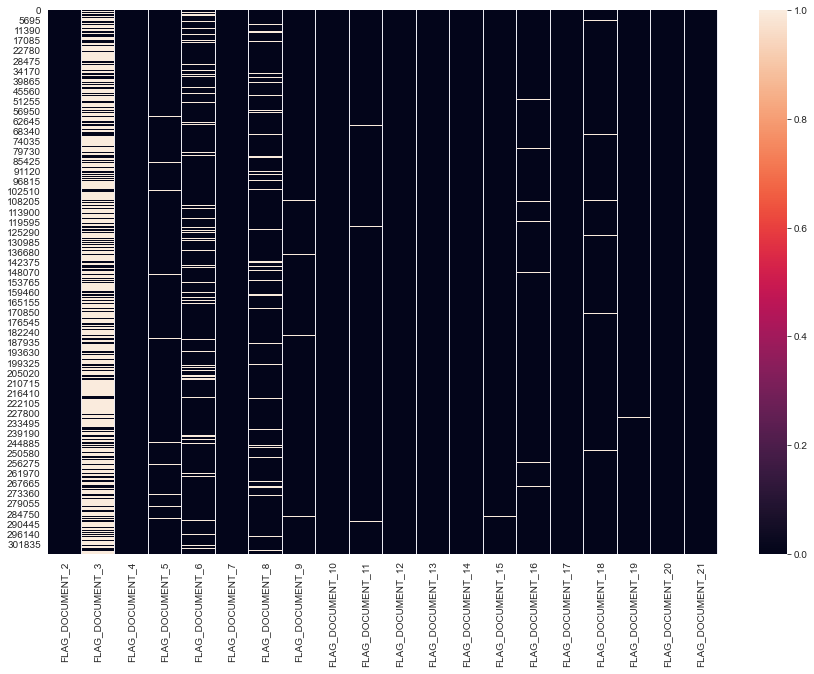

In [21]:
# analaysing "FLAG_DOCUMENT" columns i.e "FLAG_DOCUMENT_2","FLAG_DOCUMENT_3".."FLAG_DOCUMENT_21"
plt.figure(figsize = (15,10))
sns.heatmap(application_df.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"])
plt.show()

#### Remarks : 
     1. From the heatmap, we can see all the documents were provided by the client(except document 3)
     2. Since there is no clear information about the type of documents, we can drop these columns.

In [22]:
# Removing unwanted columns from the dataset

unwanted_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
        'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


application_df = application_df.drop(unwanted_columns,axis=1)


In [23]:
print("The Dimension of remaining application dataset : ",application_df.shape)

The Dimension of remaining application dataset :  (307511, 44)


In [24]:
# Checking the missing value percentage once again

round(application_df.isnull().mean()*100,2).sort_values(ascending = False)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
NAME_TYPE_SUITE                 0.42
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
AMT_CREDIT                      0.00
NAME_EDUCATION_TYPE             0.00
NAME_INCOME_TYPE                0.00
AMT_ANNUITY                     0.00
FLAG_OWN_REALTY                 0.00
AMT_INCOME_TOTAL                0.00
CNT_CHILDREN                    0.00
NAME_HOUSING_TYPE               0.00
FLAG_OWN_CAR                    0.00
CODE_GENDER                     0.00
NAME_CONTRACT_TYPE              0.00
TARGET                          0.00
N

In [25]:
# list of columns of application_df

print(application_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BURE

In [26]:
# The different datatypes present in these columns
print(application_df.dtypes.value_counts())

float64    19
int64      13
object     12
dtype: int64


In [27]:
# Now we need to identify the metrics with which we would replace the  values of
# columns with significantly less null values.

#### Analysis of columns having less than 20% of missing and  checking if imputation required or not

In [28]:
less_missing_value = application_df.isnull().mean()
less_missing_value = less_missing_value[less_missing_value < 0.2]
less_missing_value.sort_values(ascending=False)

EXT_SOURCE_3                   0.198253
AMT_REQ_CREDIT_BUREAU_YEAR     0.135016
AMT_REQ_CREDIT_BUREAU_QRT      0.135016
AMT_REQ_CREDIT_BUREAU_MON      0.135016
AMT_REQ_CREDIT_BUREAU_WEEK     0.135016
AMT_REQ_CREDIT_BUREAU_DAY      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR     0.135016
NAME_TYPE_SUITE                0.004201
DEF_60_CNT_SOCIAL_CIRCLE       0.003320
OBS_60_CNT_SOCIAL_CIRCLE       0.003320
DEF_30_CNT_SOCIAL_CIRCLE       0.003320
OBS_30_CNT_SOCIAL_CIRCLE       0.003320
EXT_SOURCE_2                   0.002146
AMT_GOODS_PRICE                0.000904
AMT_ANNUITY                    0.000039
CNT_FAM_MEMBERS                0.000007
LIVE_REGION_NOT_WORK_REGION    0.000000
NAME_INCOME_TYPE               0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000


**CNT_FAM_MEMBERS**

In [29]:
# count of  family members
application_df.CNT_FAM_MEMBERS.value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
NaN          2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [30]:
# Remark :  There are two NaN values. Since this is a continuous variable , we can impute it with mean / median

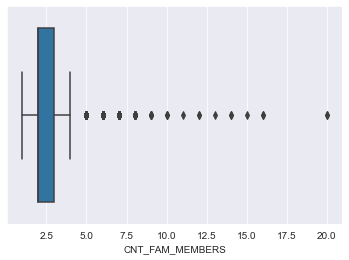

In [31]:
# plot of count of family members
sns.boxplot(application_df.CNT_FAM_MEMBERS)
plt.show()

In [32]:
application_df.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [33]:
impute_missing_value = application_df.CNT_FAM_MEMBERS.median()
print(f'Since CNT_FAM_MEMBERS has outliers, we can impute the missing values with median value i.e {impute_missing_value}')

Since CNT_FAM_MEMBERS has outliers, we can impute the missing values with median value i.e 2.0


**AMT_ANNUITY**

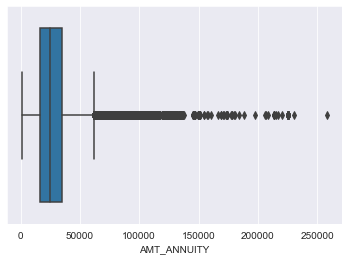

In [34]:
sns.boxplot(application_df['AMT_ANNUITY'])
plt.show()

In [35]:
null_values = application_df['AMT_ANNUITY'].isnull().sum()
print('The total number of null values in AMT_ANNUITY column is : {}'.format(null_values))

The total number of null values in AMT_ANNUITY column is : 12


In [36]:
print(application_df['AMT_ANNUITY'].describe())

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


**Remark** : We can clearly see from the boxplot that AMT_ANNUITY column has outliers and  there is huge difference between min and max value. So, we can use the median value to impute the null values.

In [37]:
impute_null_values = application_df['AMT_ANNUITY'].median()
print('The null values can be imputed with the median of the column i.e {}'.format(impute_null_values))

The null values can be imputed with the median of the column i.e 24903.0


**AMT_GOODS_PRICE**

In [38]:
# statistical description of  AMT_GOODS_PRICE column
application_df['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

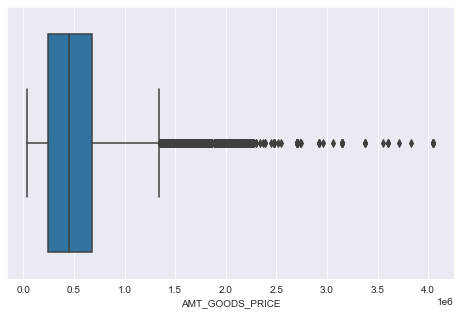

In [39]:
# AMT_GOOD_PRICE is continuous variable , so we check for outliers.
plt.figure(figsize=(8,5))
sns.boxplot(application_df['AMT_GOODS_PRICE'])
plt.show()

In [40]:
# checking the number of null values
null_values  =  application_df['AMT_GOODS_PRICE'].isnull().sum()
print('The total number of null values in AMT_GOODS_PRICE column is : {} '.format(null_values))

The total number of null values in AMT_GOODS_PRICE column is : 278 


**Remark:** Since AMT_GOODS_PRICE is a continuous variable with outliers, we shall impute the column with median value 

In [41]:
impute_null_values = round(application_df['AMT_GOODS_PRICE'].median(),2)
print('The null values can be imputed with the median of the column i.e {}'.format(impute_null_values))

The null values can be imputed with the median of the column i.e 450000.0


**NAME_TYPE_SUITE**

In [42]:
# checking the values in NAME_TYPE_SUITE
application_df['NAME_TYPE_SUITE'].value_counts().sort_values(ascending=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [43]:
# checking total number of null values in  NAME_TYPE_SUITE
null_values = application_df['NAME_TYPE_SUITE'].isnull().sum()
print(null_values)

1292


In [44]:
# since this is a categorical column , so we find the mode of the column
application_df['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

**Remarks**: Since  NAME_TYPE_SUITE is a categorical variable, we can replace the null values with the mode of the column.

In [45]:
impute_null_values = application_df['NAME_TYPE_SUITE'].mode()[0]
print('The null values can be imputed with the mode of the column :  {''}'.format(impute_null_values))

The null values can be imputed with the mode of the column :  Unaccompanied


**CODE_GENDER**

In [46]:
# Checking the Gender column to get a count of each gender M/F
application_df['CODE_GENDER'].value_counts().sort_values(ascending=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**Remarks**:  The Female gender is in majority and  there are  4 rows which are mentioned as  XNA which means 'Not Available'. There won't be a major impact on the dataset if we can delete these rows as their number is insignificant.

In [47]:
# Dropping the rows with Gender = XNA as they are very small in number
application_df = application_df[application_df["CODE_GENDER"] != 'XNA']
print(application_df["CODE_GENDER"].value_counts())

F    202448
M    105059
Name: CODE_GENDER, dtype: int64


**ORGANIZATION_TYPE**

In [48]:
# Checking the types of organization where client works
application_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [49]:
# Describing the ORGANIZATION_TYPE column

application_df['ORGANIZATION_TYPE'].describe()

count                     307507
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

**Remarks** :  For the column 'ORGANIZATION_TYPE' We have a total of 307507 rows of which 55374 rows have "XNA" values. This accounts for 18% of the column. We can discard these rows.

**Dropping few more irrelavant columns**

In [50]:
# columns 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'
# have 0.33% of null values


# Let's check a count of null values in  these columns

application_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].isnull().sum()


OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

In [51]:
application_df[['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                                'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306486.000000,306486.000000,306486.000000,306486.000000
mean,1.422209,0.143406,1.405255,0.100034
std,2.400931,0.446644,2.379744,0.362221
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [52]:
# Let's drop these columns as they seem irrelavant for analysis
application_df = application_df.drop(columns =['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
                                                               'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'])

In [53]:
# Lets' check EXT_SOURCE_3 and EXT_SOURCE_2 columns

print(application_df['EXT_SOURCE_3'].isnull().mean()*100)

print (application_df['EXT_SOURCE_2'].isnull().mean()*100)

19.825564946489024
0.21462926047211933


**Remarks** : EXT_SOURCE_3 has 19.8% of its values as null values and EXT_SOURCE_2 has 0.21% of its values as null values.
Since we don't have a clear idea about what these columns refer to, we can drop these columns.

In [54]:
# dropping EXT_SOURCE_3 and EXT_SOURCE_2
application_df = application_df.drop(columns = ['EXT_SOURCE_3','EXT_SOURCE_2'])

In [55]:
application_df.shape

(307507, 38)

In [56]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

**2.2 Handling Outliers**

In [57]:
# checking  continuous variables like  'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'

round(application_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']].describe(percentiles = [0.75, 0.9, 0.95, .99]))

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,307507.0,307507.0,307495.0
mean,168798.0,599029.0,27109.0
std,237125.0,402493.0,14494.0
min,25650.0,45000.0,1616.0
50%,147150.0,513531.0,24903.0
75%,202500.0,808650.0,34596.0
90%,270000.0,1133748.0,45954.0
95%,337500.0,1350000.0,53325.0
99%,472500.0,1854000.0,70006.0
max,117000000.0,4050000.0,258026.0


From the above statistical description of the three columns we can clearly see there are huge differences 
between maximum,95th and 99th percentile. Also there is huge gap between maximum and minimum range.

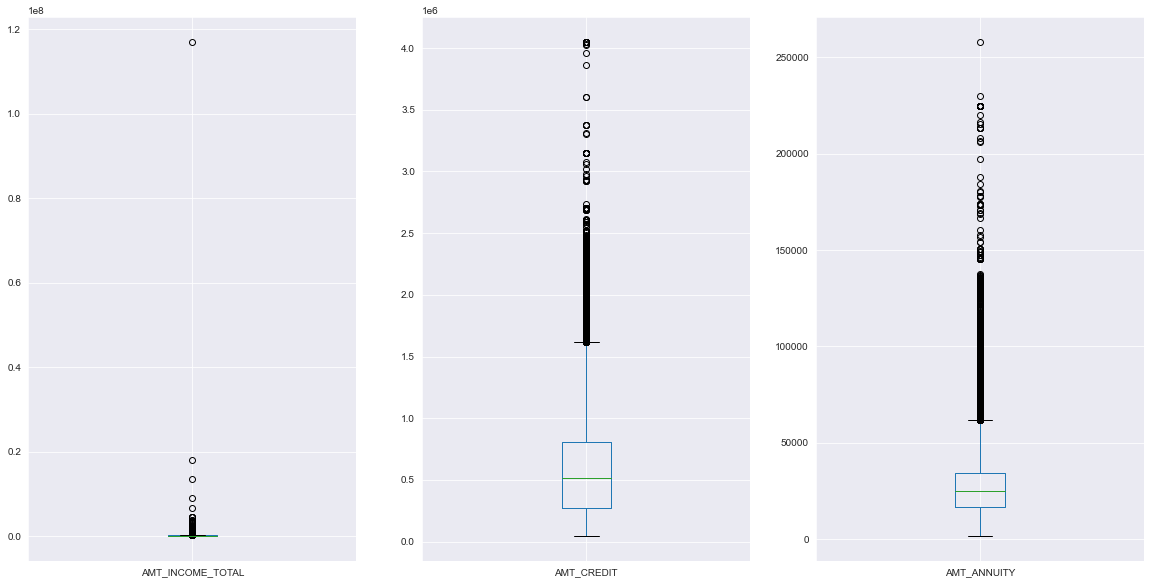

In [58]:
# Let's confirm the same using boxplots

plt.figure(figsize = (20,10))

#For AMT_INCOME_TOTAL
plt.subplot(1,3,1)
application_df.boxplot('AMT_INCOME_TOTAL')

#For AMT_CREDIT
plt.subplot(1,3,2)
application_df.boxplot('AMT_CREDIT')

#For AMT_ANNUITY
plt.subplot(1,3,3)
application_df.boxplot('AMT_ANNUITY')


plt.show()


**Remarks**: 
           
        1.We observe that AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY have huge outliers as entries are having very large 
        income, credit and annuity as compared to others.
           
        2. so we exclude the values outside the 99th percentile for AMT_INCOME_TOTAL,AMT_CREDIT and AMT_ANNUITY.

In [59]:
# excluding the values outside 99th percentile
application_df = application_df[application_df['AMT_ANNUITY'] < np.nanpercentile(application_df['AMT_ANNUITY'], 99)]

In [60]:
application_df = application_df[application_df['AMT_INCOME_TOTAL'] < np.nanpercentile(application_df['AMT_INCOME_TOTAL'], 99)]

In [61]:
application_df = application_df[application_df['AMT_CREDIT'] < np.nanpercentile(application_df['AMT_CREDIT'], 99)]

## 3. Data Manipulation

**3.1 BINNING**

In [62]:
# checking differnt quantile for AMT_INCOME_TOTAL

application_df['AMT_INCOME_TOTAL'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0     25650.0
0.2     94500.0
0.4    135000.0
0.6    157500.0
0.8    216000.0
1.0    445500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [63]:
# Creating a new categorical column based on income total

application_df['INCOME_RANGE'] = pd.qcut(application_df['AMT_INCOME_TOTAL'],q=[0,0.2,0.4,0.6,0.8,1],
                                        labels = ['VeryLow','Low','Medium','High','VeryHigh'] )

In [64]:
application_df['INCOME_RANGE'].head()

0        High
1    VeryHigh
2     VeryLow
3         Low
4         Low
Name: INCOME_RANGE, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [65]:
# checking differnt quantile for AMT_CREDIT

application_df['AMT_CREDIT'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0      45000.0
0.2     251280.0
0.4     405000.0
0.6     585000.0
0.8     863226.0
1.0    1764108.0
Name: AMT_CREDIT, dtype: float64

In [66]:
# Creating a new categorical column based on AMT_CREDIT

application_df['CREDIT_RANGE'] = pd.qcut(application_df['AMT_CREDIT'],q=[0,0.2,0.4,0.6,0.8,1],
                                        labels = ['VeryLow','Low','Medium','High','VeryHigh'] )

In [67]:
application_df['CREDIT_RANGE'].head()

0      Medium
1    VeryHigh
2     VeryLow
3         Low
4      Medium
Name: CREDIT_RANGE, dtype: category
Categories (5, object): ['VeryLow' < 'Low' < 'Medium' < 'High' < 'VeryHigh']

In [68]:
# Creating AGE column based on Days_Birth

application_df['AGE'] = abs(round((application_df['DAYS_BIRTH'].replace('-',''))/365,2)).astype(int)

In [69]:
application_df['AGE'].max()

69

In [70]:
# Creating AGE_GROUP buckets

application_df['AGE_GROUP'] = pd.cut(x=application_df['AGE'],bins = [20,30,40,50,60,70],
                                    labels =['20-30','31-40','41-50','51-60','61-70'])

In [71]:
application_df['AGE_GROUP'].dtype

CategoricalDtype(categories=['20-30', '31-40', '41-50', '51-60', '61-70'], ordered=True)

In [72]:
# converting the DAYS_EMPLOYED to years 
application_df['DAYS_EMPLOYED'].head()
# since it is in negative form so we need to apply absolute function too.

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [73]:
application_df['YEARS_EMPLOYED'] = abs(round((application_df['DAYS_EMPLOYED'].replace('-',''))/365,2)).astype(int) 

In [74]:
application_df['YEARS_EMPLOYED'].value_counts().head()

1000    54333
1       30867
2       28643
0       27008
3       24165
Name: YEARS_EMPLOYED, dtype: int64

In [75]:
# There is one outlier with YEARS_EMPLOYED as 1000 which is not_possible.
#  let's replace this with value 1 , which seems logical(years are only 0, 1,2,3.)

application_df['YEARS_EMPLOYED'] = application_df['YEARS_EMPLOYED'].replace(1000,1)

In [76]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_RANGE,CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,High,Medium,25,20-30,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,VeryHigh,VeryHigh,45,41-50,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,VeryLow,VeryLow,52,51-60,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,52,51-60,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,Low,Medium,54,51-60,8


**3.2 Categorical and Numerical columns**

In [77]:
cat_cols = application_df.select_dtypes(np.object).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [78]:
numeric_cols = application_df.select_dtypes(np.number).columns
numeric_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

## 4. Graphical Analysis

#### 4.1  DATA IMBALANCE

In [79]:
# checking for data imbalance
application_df.TARGET.value_counts(normalize=True)*100

0    91.809488
1     8.190512
Name: TARGET, dtype: float64

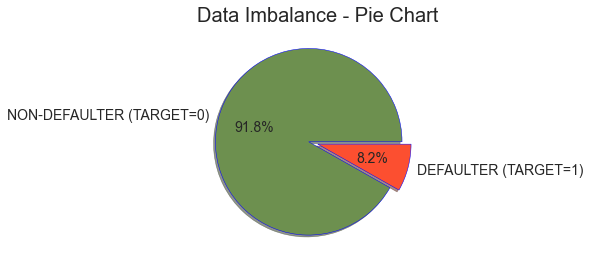

In [187]:
# As, the majority of data belongs to target 0  and very less belong to target 1 , it depicts that there is data imbalance.

plt.pie(application_df['TARGET'].value_counts(normalize=True)*100,labels=['NON-DEFAULTER (TARGET=0)','DEFAULTER (TARGET=1)'],
        explode=(0.1,0),autopct='%1.1f%%',colors = ['#6d904f','#fc4f30'],shadow =True,wedgeprops ={"edgecolor":"Blue"})
plt.title('Data Imbalance - Pie Chart',fontdict={'fontsize':20})
plt.show()

**Remarks** :  It is clear that there is an imbalance between the people who defaulted and who didn't default.More than 91% of people did not defaulted  as opposed  to 8 % of the people who defaulted.

#### 4.2 Splitting the dataframe into two separate dfs

In [81]:
# Diving the dataset into two datasets for Target = 1 and Target = 0

Non_default = application_df.loc[application_df['TARGET']==0]

default   =  application_df.loc[application_df['TARGET']== 1 ]

In [82]:
# Let's check the imbalance ratio

imbalance_ratio = round(len(Non_default)/len(default),2)
imbalance_ratio

11.21

**Remarks** : The imbalance ration is 11.21

In [83]:
len(Non_default)

272183

### 4.3 Univariate Analysis

####  4.3.1 Graphical analysis of categorical columns


**a. Gender**

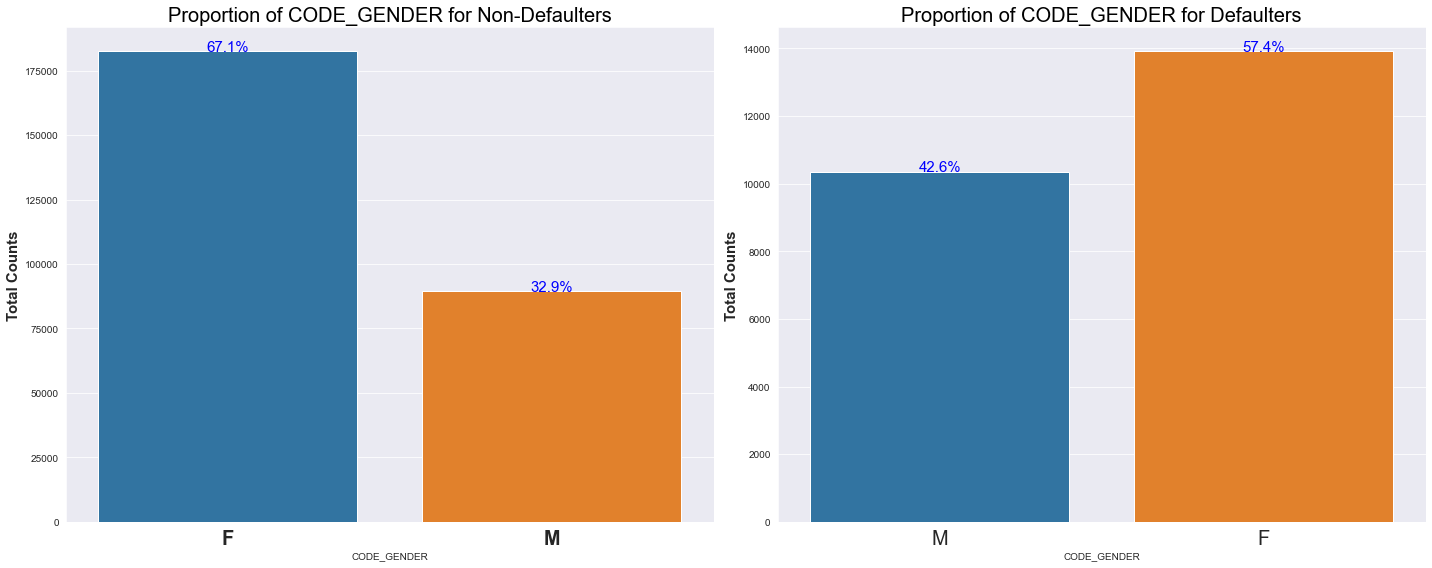

In [84]:
# Plotting based on CODE_GENDER counts

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
total_0 = len(Non_default)
total_1 = len(default)


# plotting for Non-defaulters

ax1 = sns.countplot(x= 'CODE_GENDER',data = Non_default,ax=ax1)
ax1.set_ylabel('Total Counts',fontsize = 15,fontweight = 'bold')
ax1.set_title('Proportion of CODE_GENDER for Non-Defaulters',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'})
ax1.set_xticklabels(ax1.get_xticklabels(),size = 20,fontweight = 'bold')

# Adding Percentage values for easier comparison
for p in ax1.patches:
    percentage = '{:.1f}%'.format((p.get_height()/total_0)*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax1.annotate(percentage, (x, y),ha='center',size = 15,color='Blue')


    
# Plotting for defaulters    
    
ax2 = sns.countplot(x= 'CODE_GENDER',data = default,ax=ax2)
ax2.set_ylabel('Total Counts',fontsize = 15,fontweight= 'bold')
ax2.set_title('Proportion of CODE_GENDER for Defaulters',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'})
ax2.set_xticklabels(ax2.get_xticklabels(),size = 20)

# Adding Percentage values for easier comparison
for p in ax2.patches:
    percentage = '{:.1f}%'.format((p.get_height()/total_1)*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax2.annotate(percentage, (x, y),ha='center',size = 15,color='Blue')
    
plt.tight_layout()
plt.show()


**Inferences** : 
               
               1. We can see that Female clients are 67% in the case of non-defaulters and 57% in the case of defaulters.
               2. More Female clients apply for loan than  males and hence more the number of female defaulters as well.
               
               3.*The Rate of defaulting is lower among female clients than that of the male clients.

In [85]:
# Lets define our plotfunc for plotting categorical variables 

def plot_func_uni(var):
    plt.style.use('fivethirtyeight')
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(22,10))
    total_0 = len(Non_default)
    total_1 = len(default)


# plotting for Non-defaulters

    ax1 = sns.countplot(x= var,data = Non_default,ax=ax1)
    ax1.set_ylabel('Total Counts',fontsize = 15,fontweight = 'bold')
    ax1.set_title(f'Proportion of {var} for Non-Defaulters',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)
    ax1.set_xticklabels(ax1.get_xticklabels(),size = 20,rotation=90,fontweight = 'bold')

# Adding Percentage values for easier comparison
    for p in ax1.patches:
        percentage = '{:.1f}%'.format((p.get_height()/total_0)*100)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax1.annotate(percentage, (x, y),ha='center',size = 15,color='Black',fontweight='bold')


    
# Plotting for defaulters    
    
    ax2 = sns.countplot(x= var ,data = default,ax=ax2)
    ax2.set_ylabel('Total Counts',fontsize = 15,fontweight = 'bold')
    ax2.set_title(f'Proportion of {var} for Defaulters',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)
    ax2.set_xticklabels(ax2.get_xticklabels(),size = 20,rotation=90,fontweight = 'bold')

# Adding Percentage values for easier comparison
    for p in ax2.patches:
        percentage = '{:.1f}%'.format((p.get_height()/total_1)*100)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax2.annotate(percentage, (x, y),ha='center',size = 15,color='Black',fontweight = 'bold')
    
    plt.tight_layout()
    plt.show()


**b. Car Ownership Status**

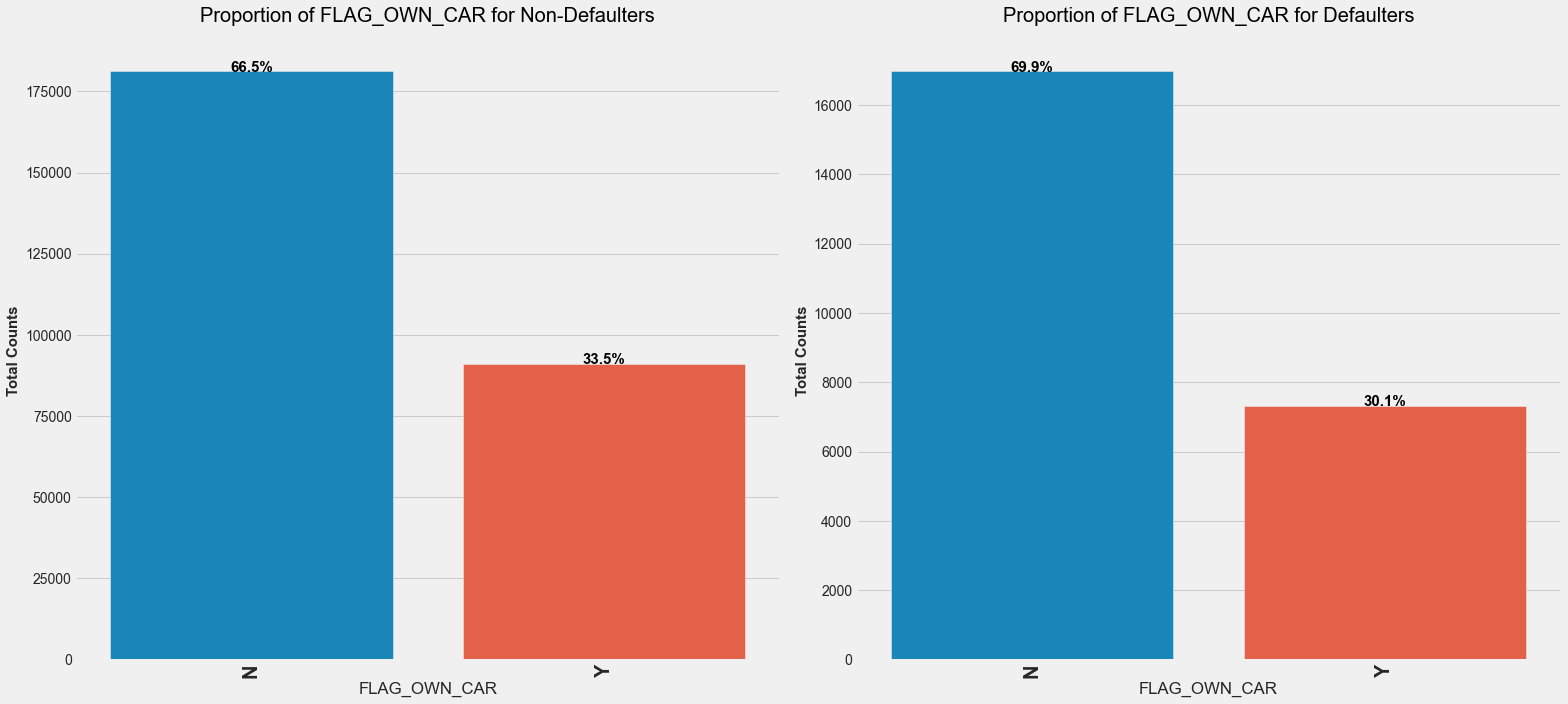

In [86]:
# Plotting based  'FLAG_OWN_CAR' Counts

plot_func_uni('FLAG_OWN_CAR')

**INFERENCES** : 
               
               1. We can see that 66 % of Non-Defaulters  and  69% of Defaulters do not own a car.
               2. The people who do not own a car default more as compared to people who own a car.The simple reason
                  could be there are more people who do not own a car.
               3. From the above plot, looking at percentages we can conclude that the rate of default by non-car owners
                  is more than car owners.

**c. Realty Ownership Status**

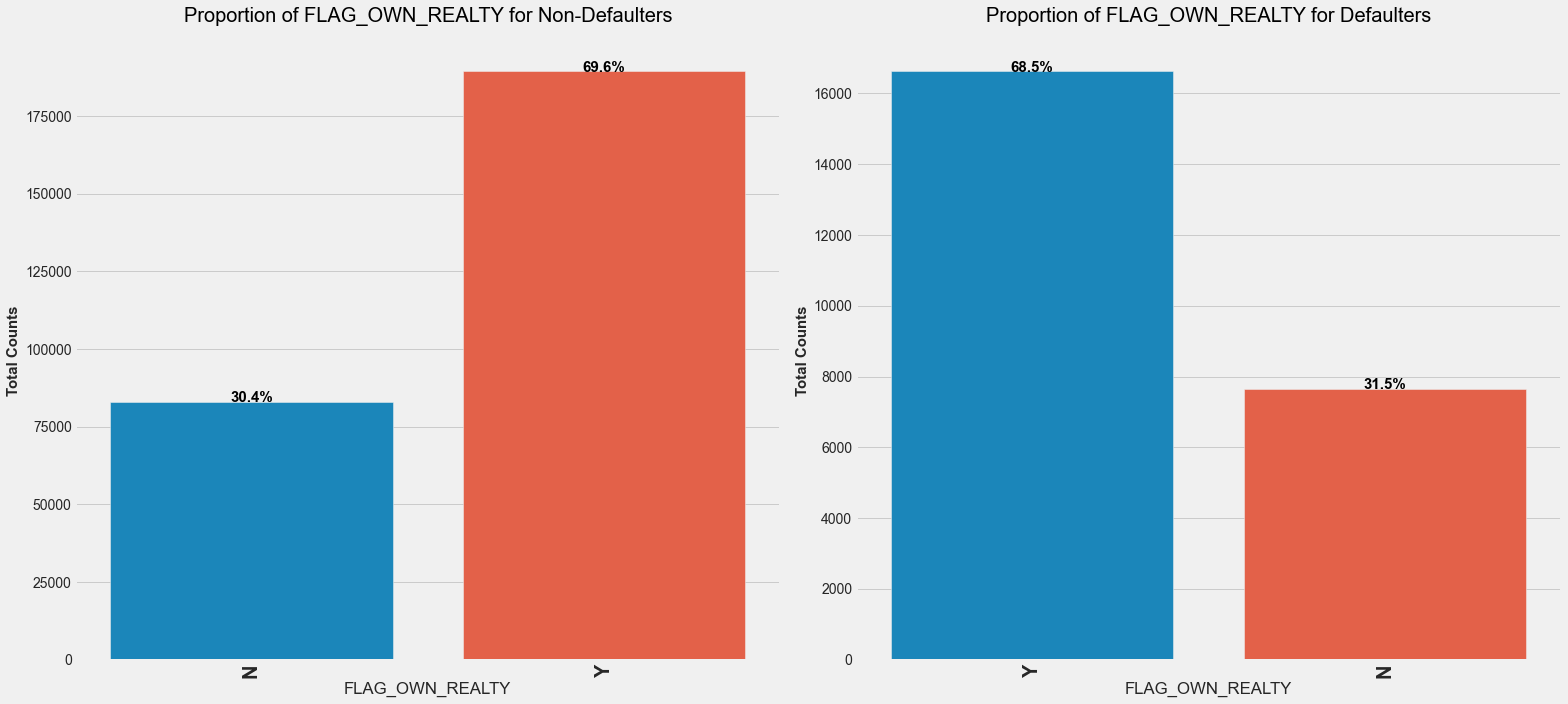

In [87]:
# Plotting  on 'FLAG_OWN_REALTY'

plot_func_uni('FLAG_OWN_REALTY')

**INFERENCES:* 

           1. We can see that 69 % of Non-Defaulters and  68% of Defaulters own a house or flat.
           2. The people who own a realty seem to default more , simply because their number seems to be higher than 
              people who do not own a realty.
          

**d. Income Type**

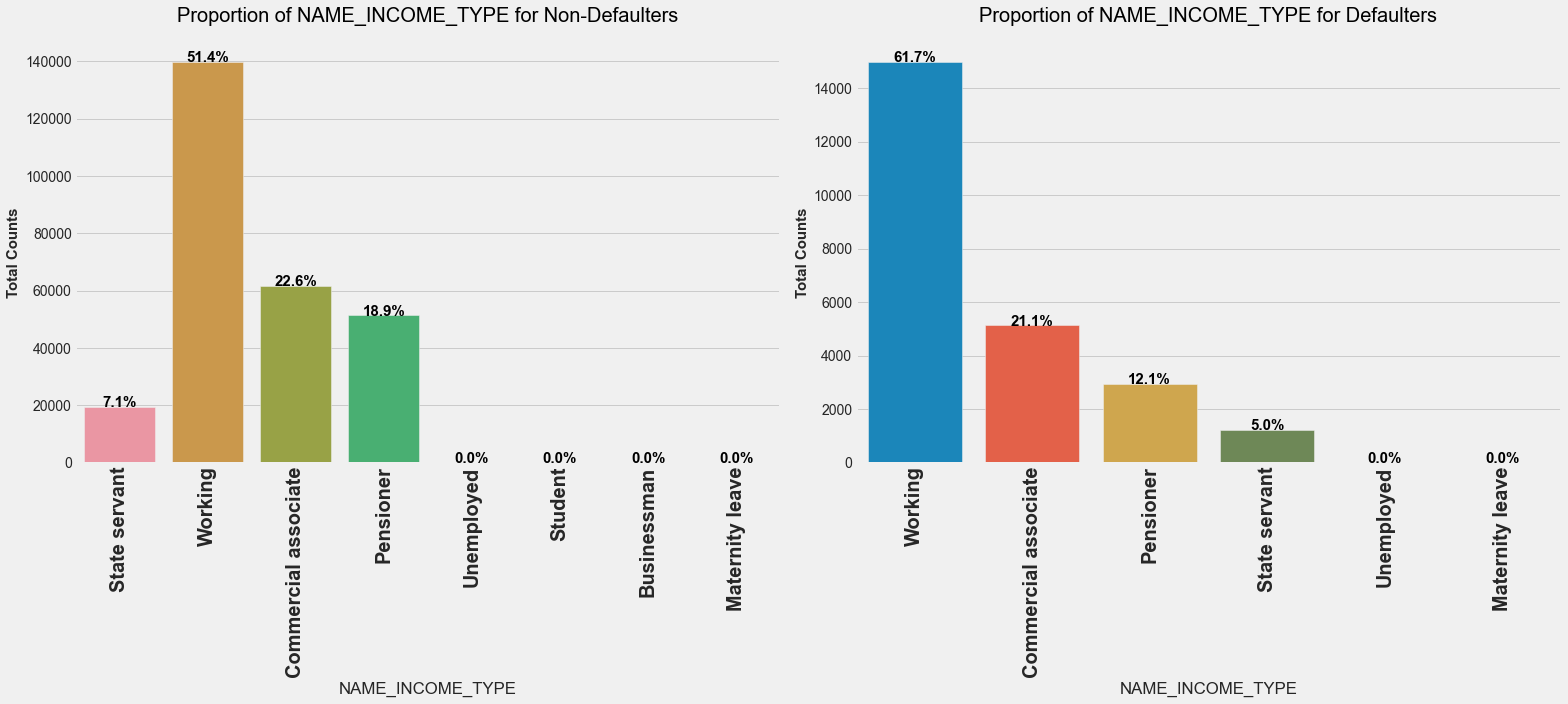

In [88]:
# Plotting on 'NAME_INCOME_TYPE'

plot_func_uni('NAME_INCOME_TYPE')

In [89]:
application_df['NAME_INCOME_TYPE'].value_counts()

Working                 154757
Commercial associate     66684
Pensioner                54322
State servant            20657
Unemployed                  21
Student                     17
Maternity leave              4
Businessman                  3
Name: NAME_INCOME_TYPE, dtype: int64

**INFERENCES:** 
             
             1. We can see that students do not default. Possible reason could be , they are not required to pay till the 
                time they are students.
             2. Also Businessmen never default.Since there are only 3 Busineesman in the dataset, this could be the 
                possible reason for this biasing.
             
             3. We can see that working class people form about 51 % in case of non-defaulters and about 61% in case of
                defaulters.SInce most applicants who applied for loan are from working class, chances of defaulting is
                also more in their case.


**e. FAMILY STATUS**

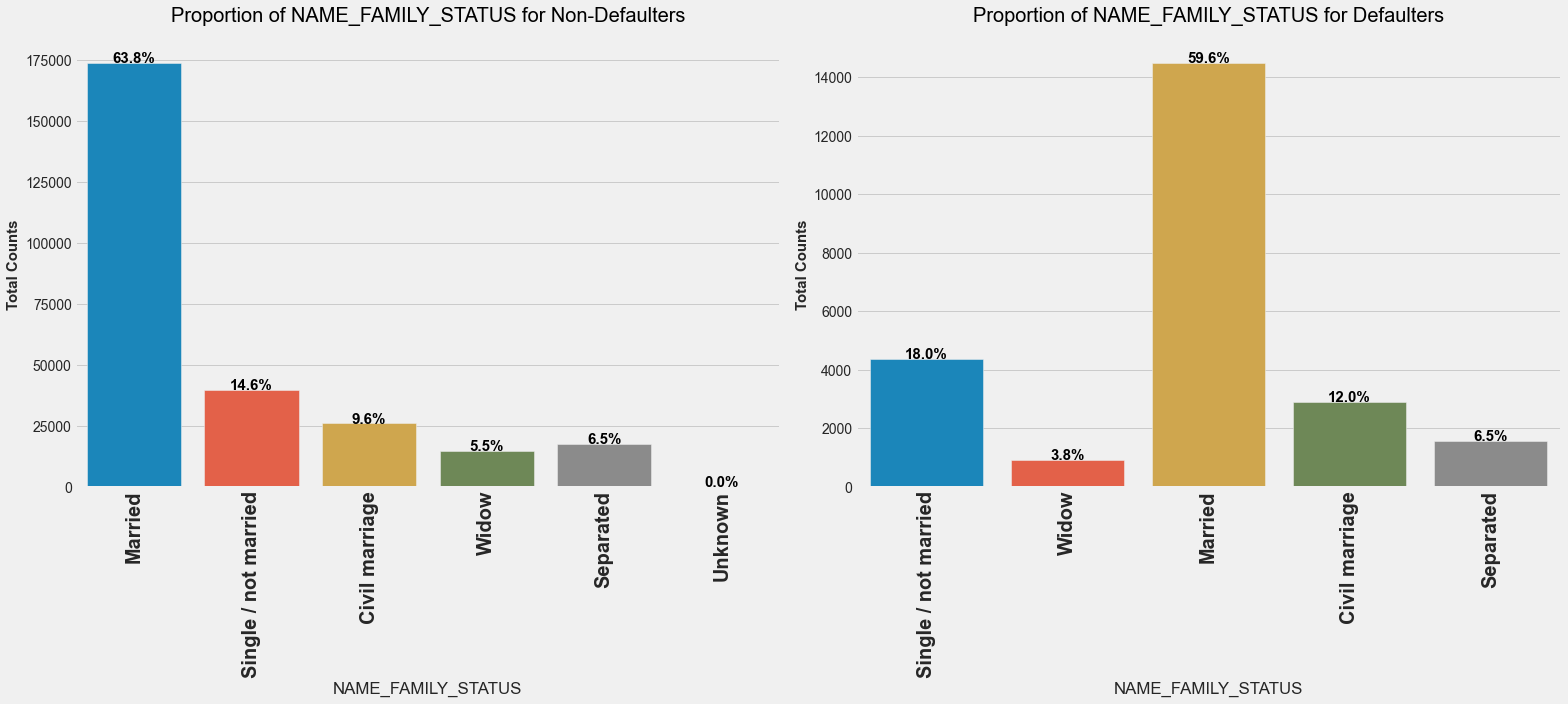

In [90]:
# Plotting on 'NAME_FAMILY STATUS' 

plot_func_uni('NAME_FAMILY_STATUS')

In [91]:
application_df['NAME_FAMILY_STATUS'].value_counts()

Married                 188250
Single / not married     44190
Civil marriage           28979
Separated                19174
Widow                    15871
Unknown                      1
Name: NAME_FAMILY_STATUS, dtype: int64

**INFERENCES:**
               
               1. It is clear from the plot that married people tend to apply more for loan . Also they constitute
                  the highest percentage among non-defaulters and defaulters.
               2. widows are lowest in percentage for both non-defaulters and defaulters.
               
               3. Also we can see from the graph that Single/not married constitute 14.6% in the case of non-defaulters and
                  18% in the case of defaulters. So their rate of default is high and hence more risk associated with them.

**f.HOUSING TYPE**

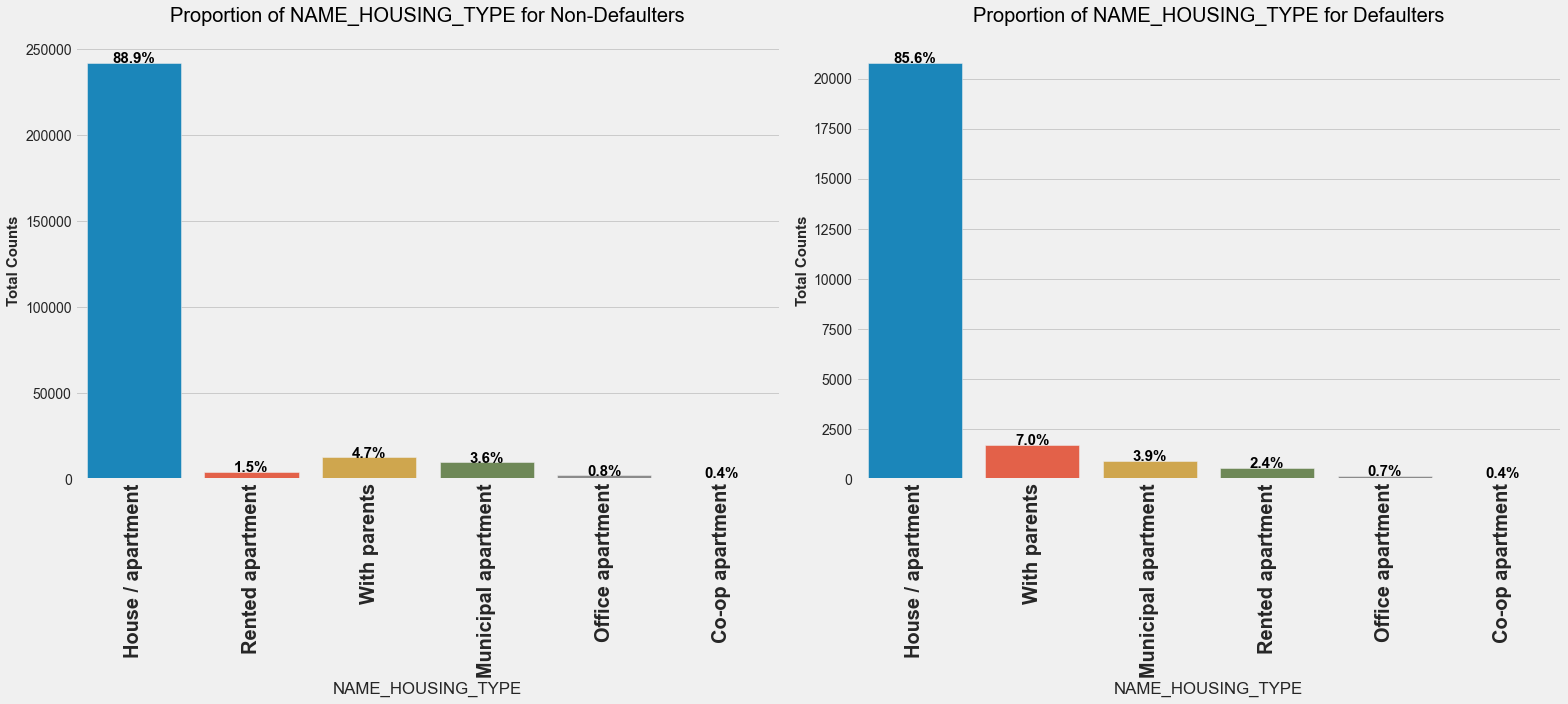

In [92]:
# plooting on 'NAME_HOUSING_TYPE'

plot_func_uni('NAME_HOUSING_TYPE')

**INFERENCES:** 

              1. It is clear from the countplot that clients who have House/Apartment tend to apply more for loans as they 
                 have the highest percentage both in non-defaulters  and defaulters.
              2. Clients living with parents have high rate of default(4.7 % in non-defaulters and 7 % in defaulters) as 
                 compared to others. The possible reason could be , high living expenses as their parents living with them.

**g. EDUCATION TYPE**

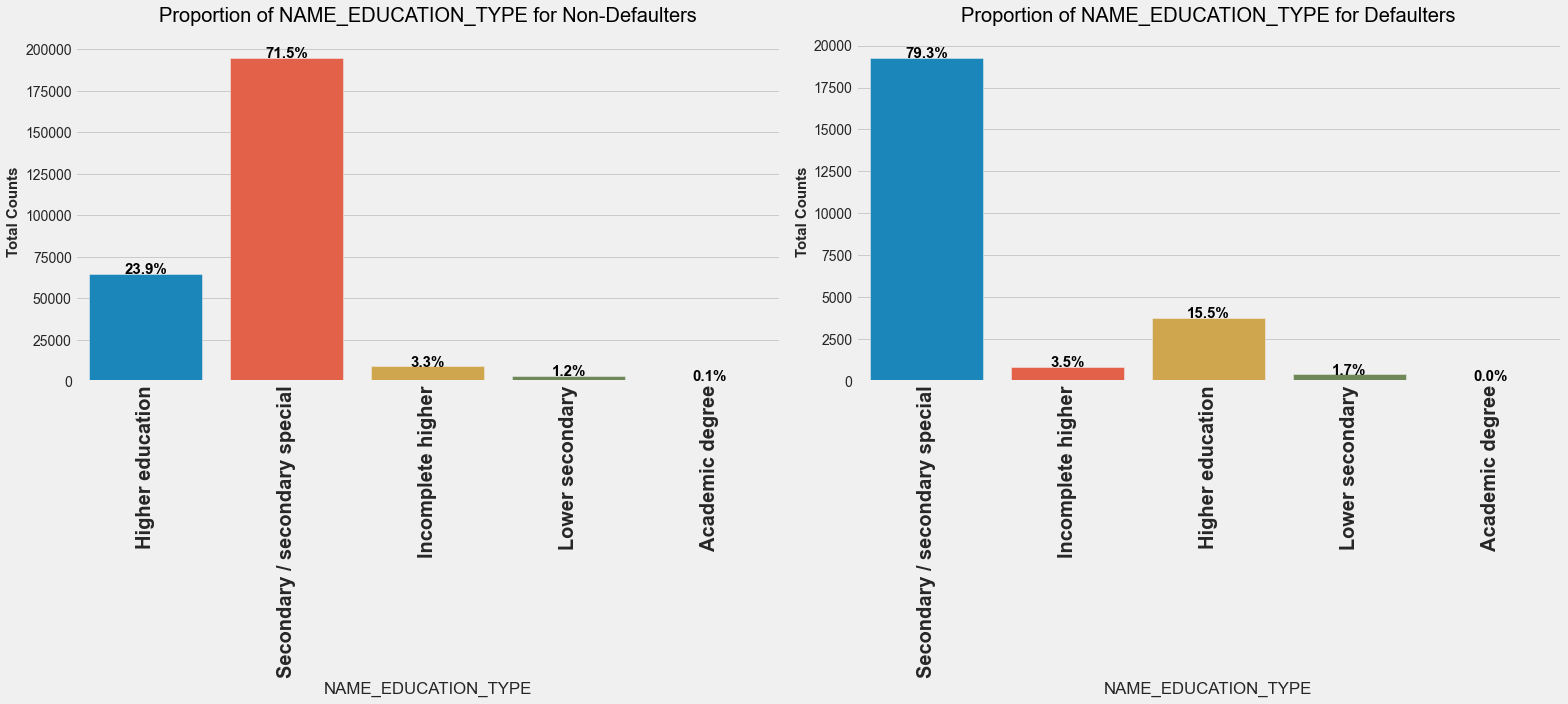

In [93]:
# Plotting on ' NAME_EDUCATION_TYPE'

plot_func_uni('NAME_EDUCATION_TYPE')

**INFERENCES:**

              1.Clients with secondary and Higher Education constitute the highest percenatge among non-defaulters as well
                as defaulters.
              2.Clients with higher education or more are less likely to default. Secondary educated people are most likely
                to default.
              
              3. we can infer from the above plot  that as the level of education increases , chances of default decreases.

**h. INCOME GROUP**

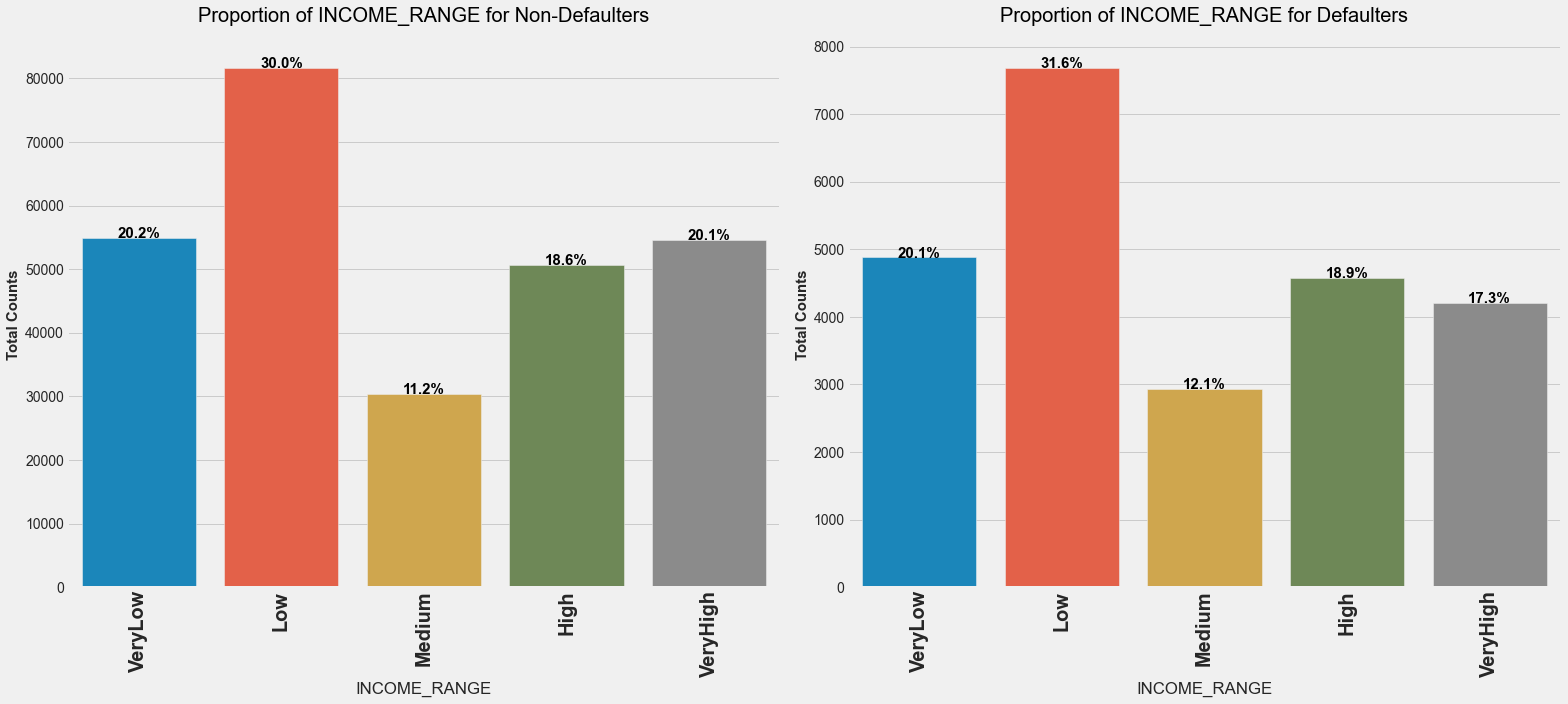

In [94]:
#plotting on'INCOME_RANGE'

plot_func_uni('INCOME_RANGE')

In [95]:
application_df['INCOME_RANGE'].value_counts()

Low         89327
VeryLow     59797
VeryHigh    58789
High        55189
Medium      33363
Name: INCOME_RANGE, dtype: int64

**INFERENCES:**

               1. The veryHigh income group has least rate of default. They constitute 17.3 %  in case of defaulters and 
                   20.1% in case of non-defaulters, clearly having a low default rate.
               2. The low income group has more default rate followed by High income group

**i. AGE_GROUP**

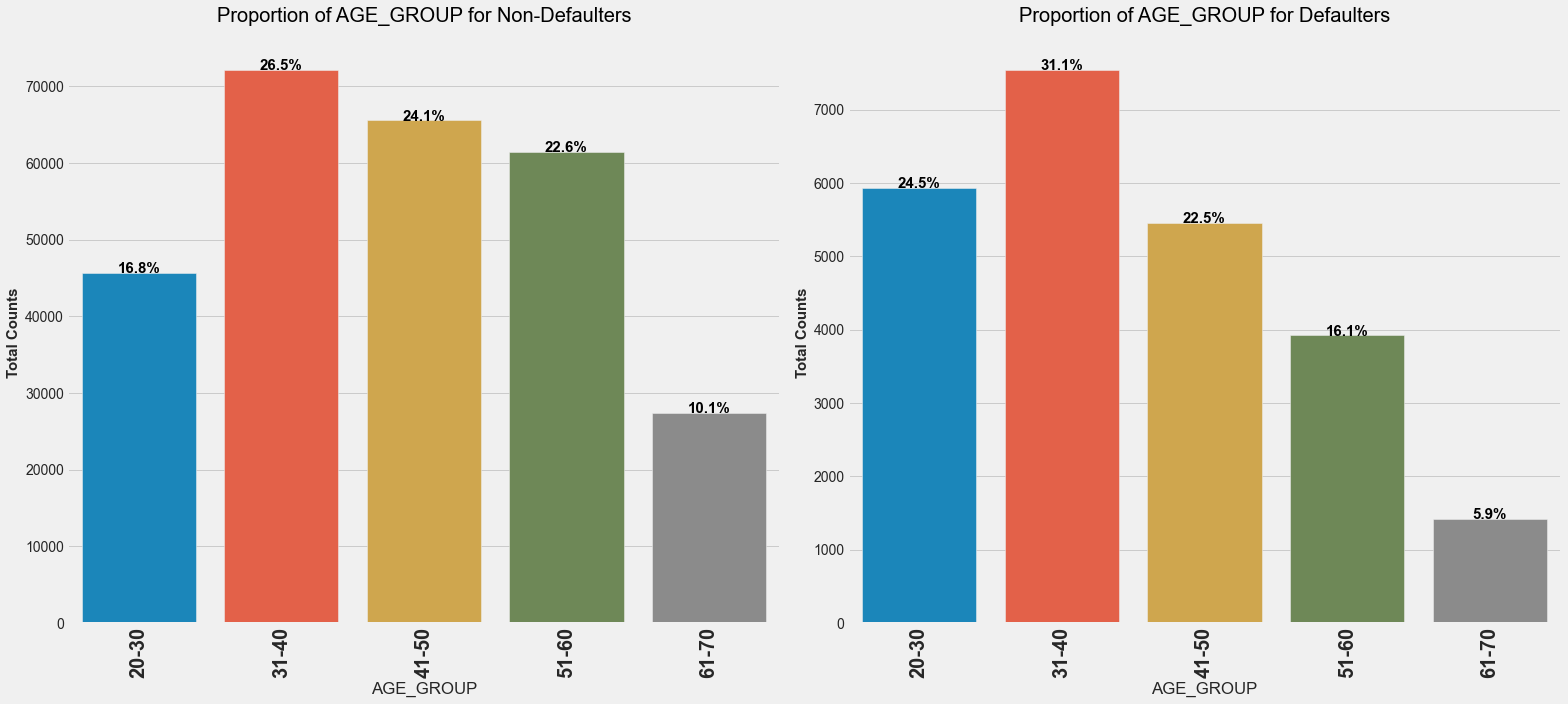

In [96]:
# plotting on ' AGE_GROUP'

plot_func_uni('AGE_GROUP')

In [97]:
application_df['AGE_GROUP'].value_counts()

31-40    79693
41-50    70982
51-60    65359
20-30    51597
61-70    28833
Name: AGE_GROUP, dtype: int64

**INFERENCES:**

               1. We can see that people in the age group [21-30] have highest default rate,constituting 24.5% in case of 
                  defaulters as compared to only 16.8% in case of non-defaulters. so they are riskiest people to give loan.
                  This is followed by people in age group [31-40] who form the highest number of applicants.
                  
               2. With increase in Age, probably after 40 years the rate of default reduces. Possible reason could be ,   
                  employment of people, increment in salary..

####  4.3.2 Univariate Continuous variable analysis

**a. INCOME_TOTAL**

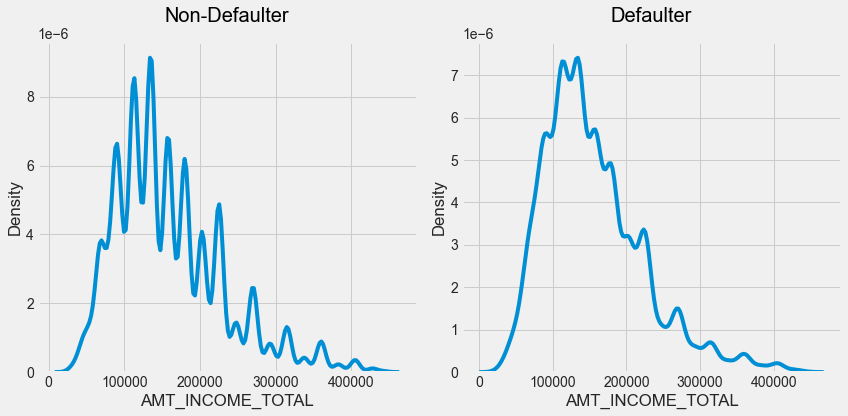

In [98]:
# plotting kdeplot of 'AMT_INCOME_TOTAL' for non-defaulters and defaulters 

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

ax1 = sns.kdeplot(x='AMT_INCOME_TOTAL',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


ax2 = sns.kdeplot(x='AMT_INCOME_TOTAL',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)

plt.tight_layout()
plt.show()


**INFERENCES:**

For both non-defaulter and defaulter we can observe increase in spikes from 750000 tto 2000000 , indicating increase in density . 

After that higher the income , lesser the spike which is clearly more obserable in case of defaulter group. This indicates 
that the density of people defaulting in higher income range  is small.



**b. AMOUNT ANNUITY**

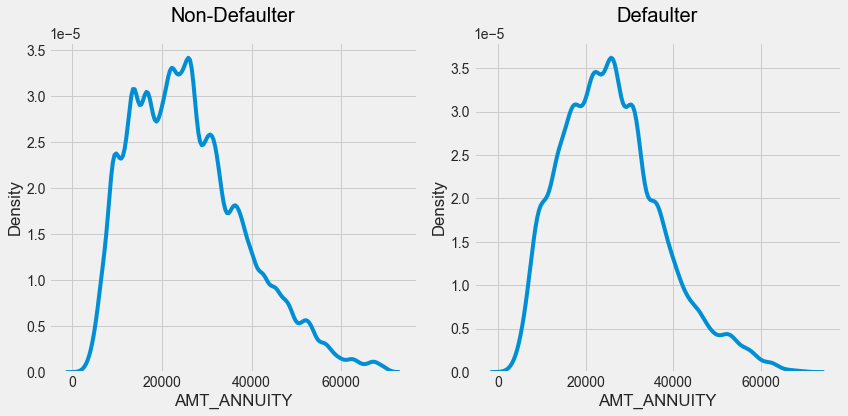

In [99]:
#plotting kdeplot for 'AMT_ANNUITY'

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

ax1 = sns.kdeplot(x='AMT_ANNUITY',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


ax2 = sns.kdeplot(x='AMT_ANNUITY',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)

plt.tight_layout()
plt.show()


**INFERENCES:** 

The AMT_ANNUITY distribution  is similar for non-defaulters and defaulters. It is mostly concentrated within 0 to 
40000 range in both the cases.

**c. AMOUNT CREDIT**

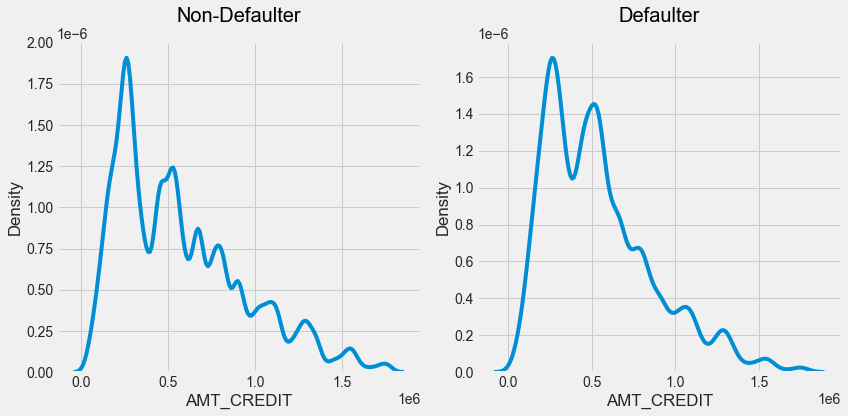

In [100]:
# plotting kdeplot for 'AMT_CREDIT'
plt.style.use('fivethirtyeight')

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

ax1 = sns.kdeplot(x='AMT_CREDIT',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


ax2 = sns.kdeplot(x='AMT_CREDIT',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)

plt.tight_layout()
plt.show()

**INFERENCES:**

We can see that lower the Credit amount , higher are the chances of default.

**d. Family Member count**


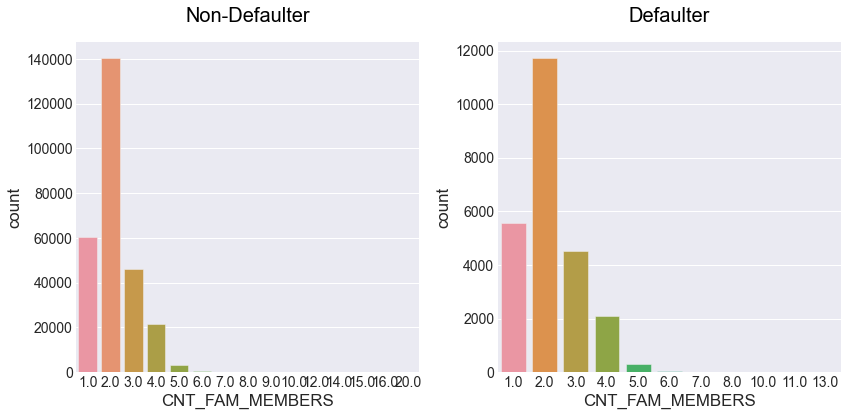

In [101]:
# plotting  on  'CNT_FAM_MEMBERs'

plt.style.use('seaborn-darkgrid')

total_0 = len(Non_default)
total_1 = len(default)

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

# For Non-Defaulter People
ax1 = sns.countplot(x='CNT_FAM_MEMBERS',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


# For Defaulter People
ax2 = sns.countplot(x='CNT_FAM_MEMBERS',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


plt.tight_layout()
plt.show()

In [102]:
application_df['CNT_FAM_MEMBERS'].value_counts()

2.0     152252
1.0      66164
3.0      50572
4.0      23663
5.0       3313
6.0        382
7.0         78
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

**INFERENCES:** We can see that a family of 2 applies more for loan.

**e. CHILDREN COUNT**

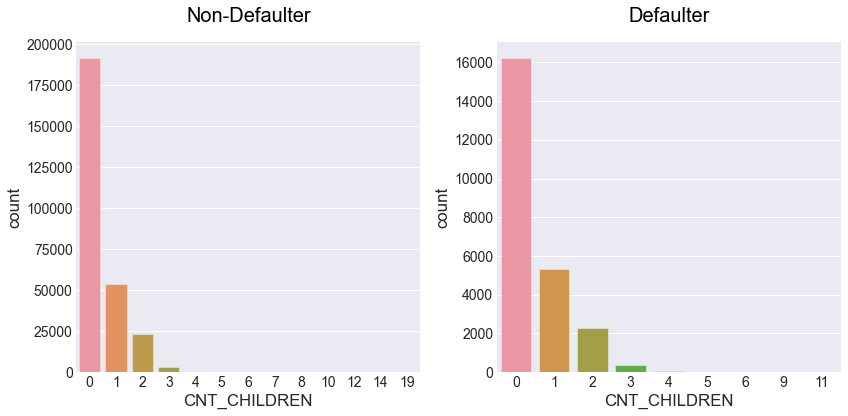

In [103]:
#plotting on 'CNT_CHILDREN'

plt.style.use('seaborn-darkgrid')

total_0 = len(Non_default)
total_1 = len(default)

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

# For Non-Defaulter People
ax1 = sns.countplot(x='CNT_CHILDREN',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


# For Defaulter People
ax2 = sns.countplot(x='CNT_CHILDREN',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


plt.tight_layout()
plt.show()


In [104]:
application_df['CNT_CHILDREN'].value_counts()

0     207891
1      58846
2      25659
3       3544
4        402
5         81
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

**INFERENCES:** 
            
            1.Most of the applicants who apply for loan do not have children.
            2.Also the default rate seems to be higher for people having no children as compared to people having children.

### 4.4 Bivariate Analysis

**4.4.1 AMOUNT CREDIT AND AMOUNT GOODS PRICE**

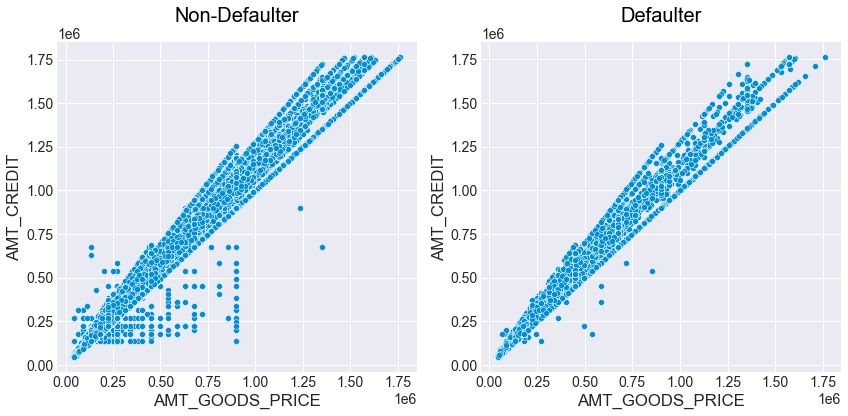

In [105]:

plt.style.use('seaborn-darkgrid')

total_0 = len(Non_default)
total_1 = len(default)

fig,(ax1,ax2) = plt.subplots(1,2 , figsize = (12,6))

# For Non-Defaulter People
ax1 = sns.scatterplot(x='AMT_GOODS_PRICE',y= 'AMT_CREDIT',data = Non_default,ax=ax1)
ax1.set_title('Non-Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


# For Defaulter People
ax2 = sns.scatterplot(x='AMT_GOODS_PRICE',y= 'AMT_CREDIT',data = default,ax= ax2)
ax2.set_title('Defaulter',fontdict={'fontsize':20, 'fontweight' : 10, 'color' : 'Black'},pad = 20)


plt.tight_layout()
plt.show()


**INFERENCES:** 

          1. AMT_CREDIT AND AMT_GOODS_PRICE HAVE linear relationship.
          
          2. For lower range of AMT_CREDIT and AMT_GOODS_PRICE, amount of defaulters is less than that of non-defaulters.

**4.4.2. Credit Amount and Education status**

**a. Defaulters(Target= 1)**

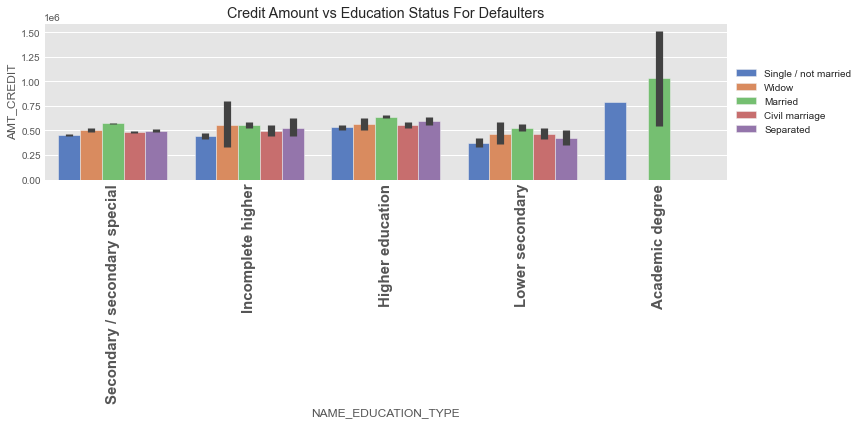

In [162]:
# Plotting 'NAME_EDUCATION_TYPE' VS 'AMT_CREDIT' for each family status

plt.figure(figsize=(12,6))

plots = sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=default, hue ='NAME_FAMILY_STATUS', palette="muted")

    
plt.title('Credit Amount vs Education Status For Defaulters')

plt.xticks(rotation=90,fontweight='bold',fontsize =15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

**INFERENCES:** 
                
              1. Married Academic Degree holding clients generally have a higher credit amount.
              2. Clients having lower educaation tend to have a lower credit amount.
              3. Accross all education segments married clients have a higher credit amount.


**b. Non-Defaulters(Target=0)**

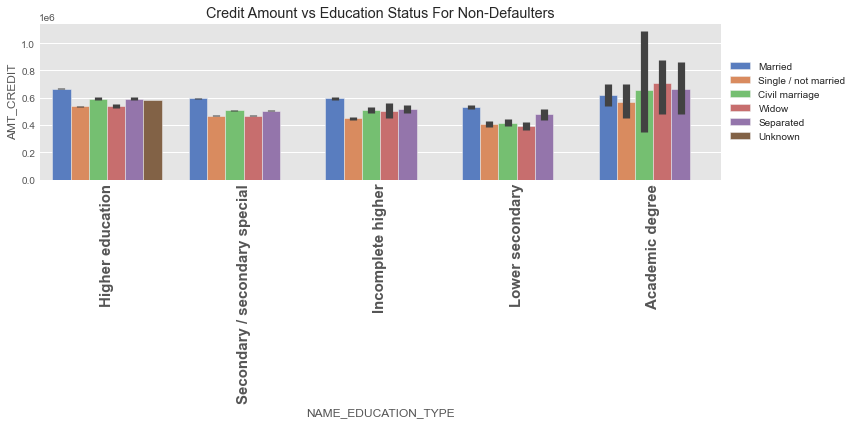

In [161]:
# Plotting 'NAME_EDUCATION_TYPE' VS 'AMT_CREDIT' for each family status

plt.figure(figsize=(12,6))

plots = sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',data=Non_default, hue ='NAME_FAMILY_STATUS', palette="muted")

    
plt.title('Credit Amount vs Education Status For Non-Defaulters')

plt.xticks(rotation=90,fontweight='bold',fontsize =15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

**INFERNECES:** 

            1.Clients holding Higher academic degree have high credit amount with Civil Marriage being highest.
            2.Clients having lower educaation tend to have a lower credit amount.
            3. Married clients have highest credit amounts in all the education segments except in Academic degree

**4.4.3. Income Amount and Education Status**

**a. Defaulters(Target=1)**

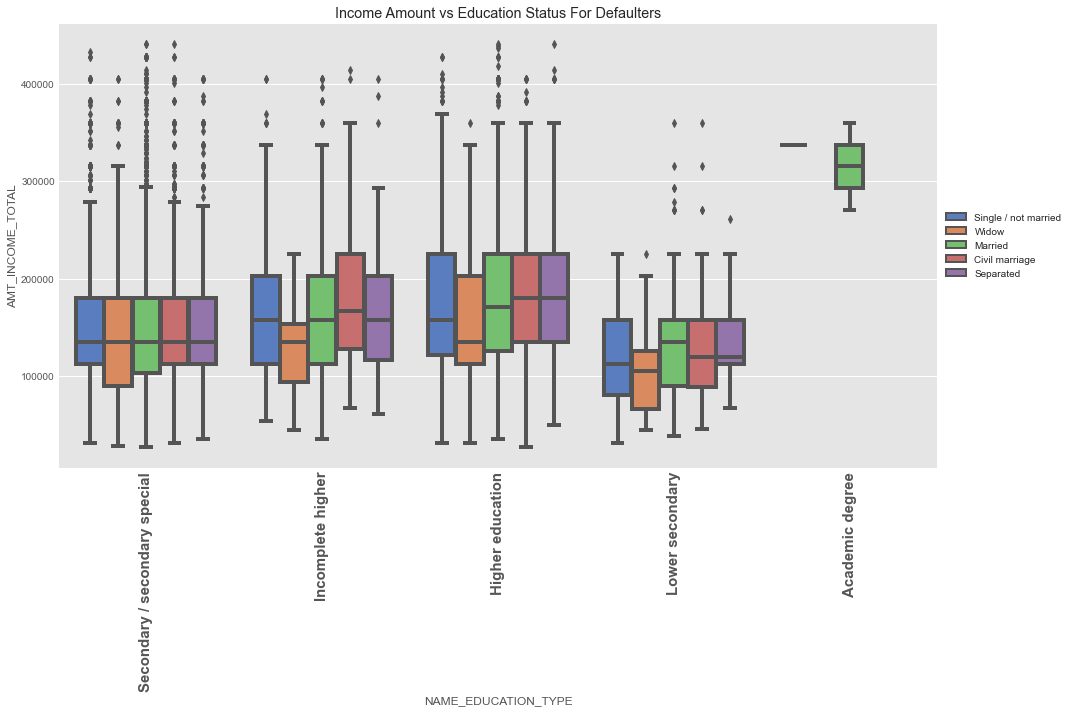

In [160]:
# Plotting boxplot for Income Amount vs Education Status 

plt.figure(figsize=(15,10))

plots = sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data= default, hue ='NAME_FAMILY_STATUS', palette="muted",
                   orient = "v")    
plt.title('Income Amount vs Education Status For Defaulters')



plt.xticks(rotation=90,fontweight='bold',fontsize =15)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

**b.Non-Defaulters(Target=1)**

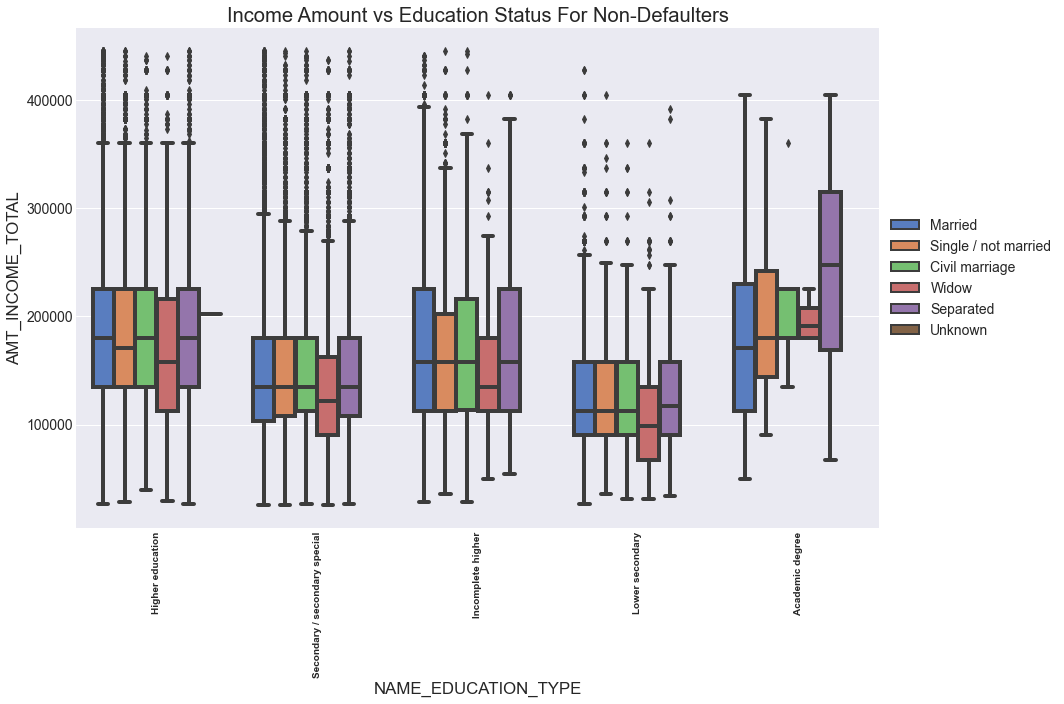

In [109]:
# Plotting boxplot for Income Amount vs Education Status 

plt.figure(figsize=(15,10))

plots = sns.boxplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data= Non_default, hue ='NAME_FAMILY_STATUS', palette="muted",
                   orient = "v")    
plt.title('Income Amount vs Education Status For Non-Defaulters')



plt.xticks(rotation=90,fontweight='bold',fontsize =10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

plt.show()

**INFERENCES:**

            1. There are many outliers in  the secondary education segment in both the groups across all family status.
            
            2. For the secondary education segment for Defaulters , the income amount mean is mostly equal.
            3. For Non-Defaulters, the income amount mean is almost equal across all education segments except Academic
               degree; for family status being 'Married', 'Single', and 'Civil Marriage'.
               
            4. Clients having lower secondary education have less income range as compared to clients having education 
               higher than them.

### 4.5 Correlation

**Top 10 correlation for Defaulters**

In [110]:
default_corr=default.corr()

default_corr_df = default_corr.where(np.triu(np.ones(default_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

In [111]:
# listing top 10 correlations for defaulters 

default_corr_df.columns=['Column1','Column2','Correlation']

default_corr_df.dropna(subset=['Correlation'],inplace=True)
default_corr_df['Abs_Correlation']=default_corr_df['Correlation'].abs()

default_corr_df = default_corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
default_corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
736,AGE,DAYS_BIRTH,-0.999692,0.999692
172,AMT_GOODS_PRICE,AMT_CREDIT,0.980965,0.980965
338,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885053,0.885053
463,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847175,0.847175
550,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.777647,0.777647
144,AMT_ANNUITY,AMT_CREDIT,0.746206,0.746206
173,AMT_GOODS_PRICE,AMT_ANNUITY,0.743832,0.743832
737,AGE,DAYS_EMPLOYED,0.578785,0.578785
260,DAYS_EMPLOYED,DAYS_BIRTH,-0.578518,0.578518
434,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.496248,0.496248


**ANALYSIS :**

            1. (AGE  , DAYS_BIRTH) and (AMT_GOODS_PRICE , AMT_CREDIT) are highly correlated.
            
            2. (AMT_ANNUITY , AMT_CREDIT) and (AMT_GOOD_PRICE , AMT_ANNUITY) are moderately correlated.
            
            3. AGE, DAYS_EMPLOYED are poorly correlated.



**TOP 10 correlation for Non-Defaulters**

In [112]:
Non_default_corr=Non_default.corr()

Non_default_corr_df = Non_default_corr.where(np.triu(np.ones(Non_default_corr.shape),k=1).astype(np.bool)).unstack().reset_index()

In [113]:
# listing top 10 correlations for defaulters 

Non_default_corr_df.columns=['Column1','Column2','Correlation']

Non_default_corr_df.dropna(subset=['Correlation'],inplace=True)
Non_default_corr_df['Abs_Correlation']=Non_default_corr_df['Correlation'].abs()

Non_default_corr_df = Non_default_corr_df.sort_values(by=['Abs_Correlation'], ascending=False)

Non_default_corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
736,AGE,DAYS_BIRTH,-0.999714,0.999714
172,AMT_GOODS_PRICE,AMT_CREDIT,0.984936,0.984936
338,CNT_FAM_MEMBERS,CNT_CHILDREN,0.877655,0.877655
463,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.862314,0.862314
550,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830024,0.830024
173,AMT_GOODS_PRICE,AMT_ANNUITY,0.773055,0.773055
144,AMT_ANNUITY,AMT_CREDIT,0.772432,0.772432
260,DAYS_EMPLOYED,DAYS_BIRTH,-0.623136,0.623136
737,AGE,DAYS_EMPLOYED,0.623060,0.623060
434,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.447635,0.447635


**ANALYSIS :**

            1. (AGE  , DAYS_BIRTH) and (AMT_GOODS_PRICE , AMT_CREDIT) are highly correlated.
            
            2. (AMT_ANNUITY , AMT_CREDIT) and (AMT_GOOD_PRICE , AMT_ANNUITY) are moderately correlated.
            
            3. (DAYS_EMPLOYED , DAYS_BIRTH) and (AGE , DAYS_EMPLOYED) are poorly correlated.


## Analysis of Previous Application Data

### 5. Data  Understanding and Cleaning

In [114]:
# checking previous application dataframe

prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# checking the column wise info

prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [116]:
prev_df.shape

(1670214, 37)

**5.1 Missing value Treatment**

In [117]:
# replacing 'XNA' and 'XAP values with NaN values.

prev_df = prev_df.replace('XNA',np.nan)

prev_df =  prev_df.replace('XAP',np.nan)

In [118]:
# checking the  missing value percentage of each column

round(prev_df.isnull().mean()*100,2).sort_values(ascending = False)

RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
CODE_REJECT_REASON             81.33
NAME_PRODUCT_TYPE              63.68
NAME_GOODS_CATEGORY            56.93
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_SELLER_INDUSTRY           51.23
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
DAYS_TERMINATION               40.30
NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
NAME_CLIENT_TYPE                0.12
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
AMT_APPLICATION                 0.00
A

In [119]:
# Removing cols having more than 40% of missing values

prev_df_dropcol = prev_df.columns[prev_df.isnull().mean() >= 0.4]

In [120]:
prev_df_dropcol

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY',
       'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [121]:
# dropping columns
prev_df = prev_df.drop(prev_df_dropcol,axis=1)

In [122]:
# checking the missing value percentage one more time 
round(prev_df.isnull().mean()*100,2).sort_values(ascending = False)

NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
NAME_PORTFOLIO                 22.29
AMT_ANNUITY                    22.29
NAME_CLIENT_TYPE                0.12
PRODUCT_COMBINATION             0.02
NAME_CONTRACT_TYPE              0.02
WEEKDAY_APPR_PROCESS_START      0.00
SK_ID_CURR                      0.00
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
NFLAG_LAST_APPL_IN_DAY          0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
SK_ID_PREV                      0.00
dtype: float64

In [123]:
# checking Numerical columns

Numerical_cols = prev_df.select_dtypes(np.number).columns

Numerical_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [124]:
# checking Categorical columns

Categorical_cols = prev_df.select_dtypes(np.object).columns

Categorical_cols

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [125]:
#checking 'NAME_PAYMENT_TYPE'

prev_df['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [126]:
prev_df['NAME_PAYMENT_TYPE'].isnull().sum()

# we see that out of '1670214' entries, the 'NAME_PAYMENT_TYPE' column has '627384' missing values.

627384

**Checking columns having low percentage of missing values**

**a. NAME_CONTRACT_TYPE**

In [127]:
# checking differnt types values in 'NAME_CONTRACT_TYPE'

prev_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [128]:
# checking the missing value

prev_df['NAME_CONTRACT_TYPE'].isnull().sum()

346

In [129]:
# since this is a categorical column, we can replace the null values with mode

replace_null_values = prev_df['NAME_CONTRACT_TYPE'].mode()[0]

print(f'We can replace the missing values in  NAME_CONTRACT_TYPE with the mode : {replace_null_values}')

We can replace the missing values in  NAME_CONTRACT_TYPE with the mode : Cash loans


**b. PRODUCT_COMBINATION**

In [130]:
prev_df['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [131]:
#  checking the number of missing values

prev_df['PRODUCT_COMBINATION'].isnull().sum()

346

Since, the number of missing values is very small and rest all the entries are evenly filled across differnt categories,
we can drop rows containing missing values for 'PRODUCT_COMBINATION' . 

Dropping rows would not cause any impact on analysis as  percentage of missing values is very small(0.02%)

In [132]:
# dropping rows for PRODUCT_COMBINATION 

prev_df = prev_df.dropna(subset = ['PRODUCT_COMBINATION'])

In [133]:
prev_df['PRODUCT_COMBINATION'].isnull().sum()

0

**c. NAME_CLIENT_TYPE**

In [134]:
prev_df['NAME_CLIENT_TYPE'].value_counts()

Repeater     1230960
New           301342
Refreshed     135625
Name: NAME_CLIENT_TYPE, dtype: int64

In [135]:
# checking the number of missing values 

prev_df['NAME_CLIENT_TYPE'].isnull().sum()

1941

In [136]:
# Since this is Categorical column , we can replace the missing values with mode.


replace_null_values = prev_df['NAME_CLIENT_TYPE'].mode()[0]

print(f'We can replace the missing values in  NAME_CONTRACT_TYPE with the mode : {replace_null_values}')

We can replace the missing values in  NAME_CONTRACT_TYPE with the mode : Repeater


**5.2 Handling Outliers**

In [137]:
# Let's check variables 'AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT'

round(prev_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05,0.95, .99]),3)

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.000,1284699.000,1297984.000
mean,15955.121,227847.279,16.054
std,14782.137,315396.558,14.567
min,0.000,0.000,0.000
5%,2726.595,22882.500,0.000
50%,11250.000,112320.000,12.000
95%,45336.780,900000.000,48.000
99%,69685.789,1395000.000,60.000
max,418058.145,6905160.000,84.000


**REMARKS :**

We can, clearly see huge gap between minimum,5th , 95th and 99th percentile in AMT_ANNUITY and AMT_GOODS_PRICE column.This means they have huge outliers.

Let's confirm this in boxplot.

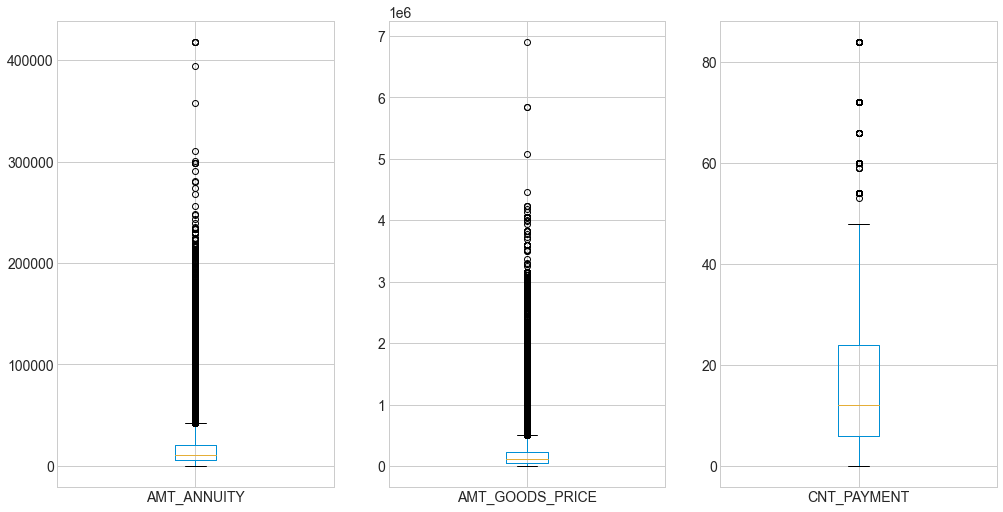

In [138]:
# Let's confirm the same using boxplots

plt.style.use('seaborn-whitegrid')

plt.figure(figsize = (15,8))

#For AMT_INCOME_TOTAL
plt.subplot(1,3,1)
prev_df.boxplot('AMT_ANNUITY')

#For AMT_CREDIT
plt.subplot(1,3,2)
prev_df.boxplot('AMT_GOODS_PRICE')

#For AMT_ANNUITY
plt.subplot(1,3,3)
prev_df.boxplot('CNT_PAYMENT')


plt.show()

**We can clearly see outliers are present in these columns**

In [139]:
# excluding values outside 99th percentile

In [140]:
prev_df = prev_df[prev_df["AMT_ANNUITY"] < np.nanpercentile(prev_df['AMT_ANNUITY'], 99)]

In [141]:
prev_df = prev_df[prev_df["AMT_GOODS_PRICE"] < np.nanpercentile(prev_df['AMT_GOODS_PRICE'], 99)]

### 6.  Merging Dataframes

In [209]:
# selecting columns from application dataframe to merge

cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_RANGE',
       'CREDIT_RANGE','AGE_GROUP','YEARS_EMPLOYED','NAME_INCOME_TYPE']

app_sub_data = application_df[cols]

app_sub_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_RANGE,CREDIT_RANGE,AGE_GROUP,YEARS_EMPLOYED,NAME_INCOME_TYPE
0,100002,1,M,Secondary / secondary special,Single / not married,High,Medium,20-30,1,Working
1,100003,0,F,Higher education,Married,VeryHigh,VeryHigh,41-50,3,State servant
2,100004,0,M,Secondary / secondary special,Single / not married,VeryLow,VeryLow,51-60,0,Working
3,100006,0,F,Secondary / secondary special,Civil marriage,Low,Low,51-60,8,Working
4,100007,0,M,Secondary / secondary special,Single / not married,Low,Medium,51-60,8,Working


In [211]:
# Merging Previous application data with app_sub_data

merged_data = pd.merge(prev_df,app_sub_data,on='SK_ID_CURR',how='left')

merged_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_RANGE,CREDIT_RANGE,AGE_GROUP,YEARS_EMPLOYED,NAME_INCOME_TYPE
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,Approved,-73,Cash through the bank,Repeater,POS,Country-wide,35,12.0,middle,POS mobile with interest,0.0,F,Incomplete higher,Married,VeryHigh,Medium,31-40,20.0,State servant
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,Approved,-164,NaN,Repeater,Cash,Contact center,-1,36.0,low_action,Cash X-Sell: low,0.0,F,Secondary / secondary special,Civil marriage,VeryLow,VeryLow,51-60,3.0,Commercial associate
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,Approved,-301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,high,Cash X-Sell: high,0.0,F,Secondary / secondary special,Married,VeryLow,Low,20-30,3.0,Working
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,Approved,-512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,12.0,middle,Cash X-Sell: middle,0.0,M,Secondary / secondary special,Married,VeryHigh,VeryHigh,51-60,1.0,Pensioner
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Refused,-781,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,24.0,high,Cash Street: high,0.0,F,Secondary / secondary special,Married,High,High,20-30,6.0,State servant


#### 6.1 Univariate Analysis

In [181]:
# Let's create a plot function 

def plot2_func_uni(var):
    plt.style.use('seaborn-darkgrid')
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    total = len(merged_data)



    ax = sns.countplot(x= var,data = merged_data,ax=ax,hue= 'NAME_CONTRACT_STATUS')
    ax.set_ylabel('Total Counts',fontsize = 10,fontweight = 'bold')
    ax.set_title(f'Distribution of {var}',fontdict={'fontsize':15, 'fontweight' : 10, 'color' : 'Black'},pad = 20)
    ax.set_xticklabels(ax.get_xticklabels(),  size = 10,fontweight = 'bold')

# Adding Percentage values for easier comparison
    for p in ax.patches:
        percentage = '{:.1f}%'.format((p.get_height()/total)*100)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',size = 15,color='Black',fontweight='bold')
    
  
        
    plt.show()


**a. NAME_CLIENT_TYPE**

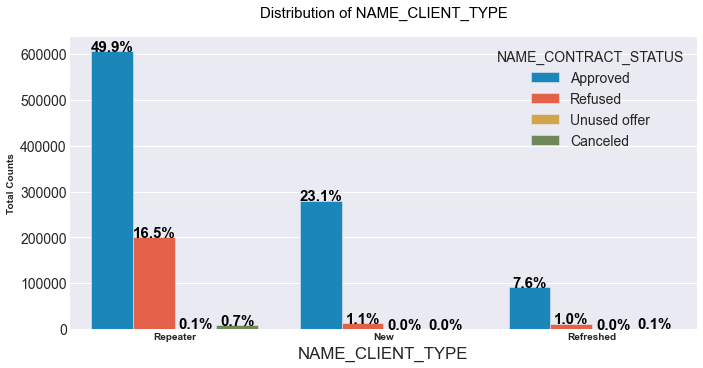

In [182]:
plot2_func_uni('NAME_CLIENT_TYPE')

**INFERENCES:**

            1. Repeater clients are highest in number, but only 49% gets accepted.
            
            2. Repeater clients also get refused most often with a refusal percentage of 16.5 % .

**b. NAME_CONTRACT_TYPE**

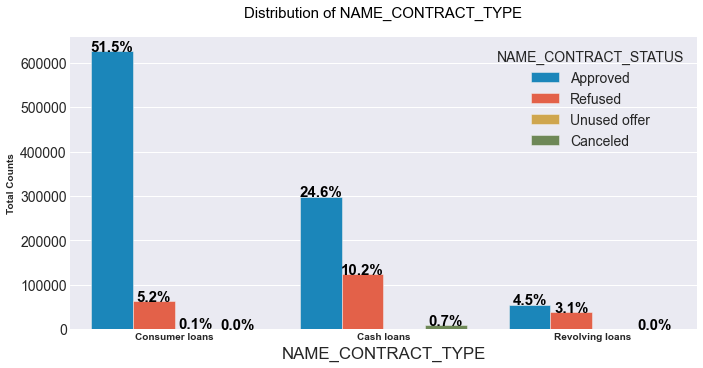

In [184]:
plot2_func_uni('NAME_CONTRACT_TYPE')

**INFERENCES:**

            1.Most applications are for consumer and cash loans.
            
            2. Cash loans have highest refusal percentage(10.2%)

**c. NAME_PAYMENT_TYPE**

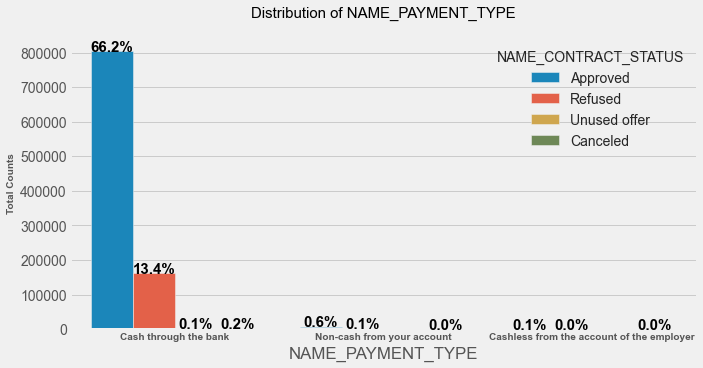

In [177]:
plot2_func_uni('NAME_PAYMENT_TYPE')

**INFERENCES:**
             
             1.We can observe that most of the clients chose tor repay their using 'Cash through bank option'.
             
             2.We can also observe that 'Non-cash from your account' and 'cashless from the account of employer' are least
               popular means of loan repayment among clients.

**d. NAME_PORTFOLIO**

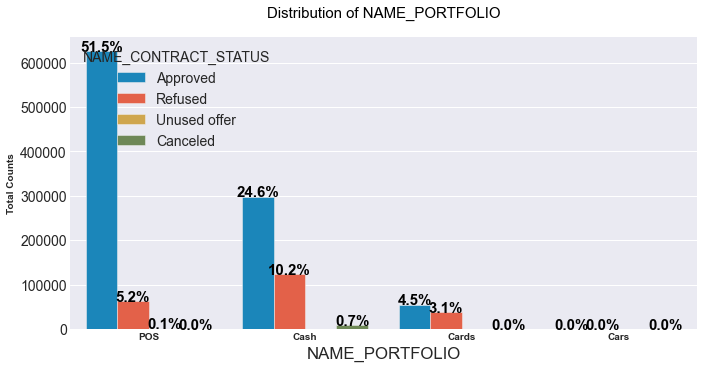

In [185]:
plot2_func_uni('NAME_PORTFOLIO')


**INFERENCES:**

            1.POS loans are highest.This means most clients had previous loan applications for POS rather than cash.
            
            2.For cash loans approval percentage is 24.6% and refusal percentage is 10.2%  whereas it is  51.5% and 
              5.2% for POS loans for the same.So we can infer that more previous applications are refused on cash loans
              than POS.

**e. Percenatge of previously approved loan applicants that defaulted in current loan**

In [149]:
total_approved_clients = merged_data[merged_data['NAME_CONTRACT_STATUS']=="Approved"].shape[0]

In [150]:
defaulted_clients = merged_data[(merged_data["TARGET"]==1) & (merged_data['NAME_CONTRACT_STATUS']=="Approved")].shape[0]

In [151]:
print(f'Percenatge of previously approved loan applicants that defaulted in current loan :  {round((defaulted_clients*100/total_approved_clients),2)} %')

Percenatge of previously approved loan applicants that defaulted in current loan :  6.38 %


**f. Percentage of previously refused loan applicants that were able to pay their current loan**

In [152]:
total_refused_clients = merged_data[merged_data['NAME_CONTRACT_STATUS']=="Refused"].shape[0]

In [153]:
nondefaulted_refused =  merged_data[(merged_data["TARGET"]==0) & (merged_data['NAME_CONTRACT_STATUS']=="Refused")].shape[0]

In [154]:
print(f'Percenatge of previously refused loan applicants that paid current loan :  {round((nondefaulted_refused*100/total_refused_clients),2)} %')

Percenatge of previously refused loan applicants that paid current loan :  72.31 %


**INFERENCES:** 

        1. 6.38 % of previously approved loan applicants defaulted the current loan.
        
        2.72 % of previously refused loan applicants were able to pay their current loan.

#### 6.2 Bivariate Analysis

In [163]:
# plot func

def plot_func_biv(cat, num):

    plt.style.use('fivethirtyeight')
    
    fig,ax = plt.subplots(1,1,figsize=(6,4))
    
    ax = sns.boxplot(x=cat, y = num, data=merged_data,)
    ax.set_ylabel(f'{num}')
    ax.set_xlabel(f'{cat}')

    ax.set_title(f'{cat}  Vs  {num}',fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")
     
    plt.show()

**6.2.1 AMT_ANNUITY VS NAME_CONTRACT_STATUS**

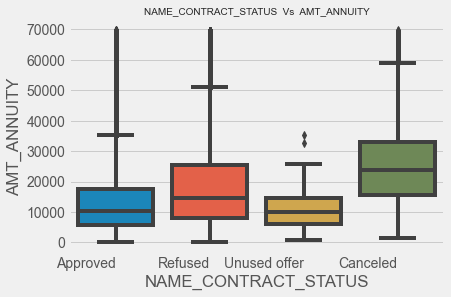

In [164]:
plot_func_biv('NAME_CONTRACT_STATUS','AMT_ANNUITY')

**INFERENCES:** 

               1. Loan applications for clients with lower annuity of previous application gets unused.
               
               2. we can also see applications with high annuity of previous application gets refused more.

#### 6.2.2 AMT_CREDIT vs NAME_CONTRACT_STATUS

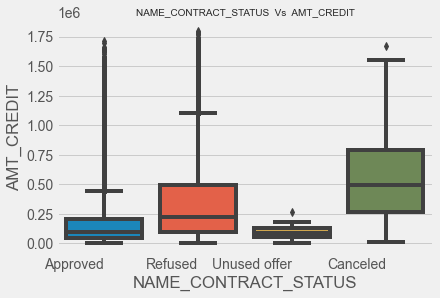

In [165]:
plot_func_biv('NAME_CONTRACT_STATUS','AMT_CREDIT')

**INFERENCES:** 

Most of the credit amount on previous application is in cancelled status.

#### 6.2.3. Bivariate Analysis on Numerical columns

In [186]:
# Bivariate analysis of 'AMT_APPLICATION','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT'

subset_data = merged_data[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]

subset_data.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,CNT_PAYMENT
0,1730.430,17145.0,17145.0,17145.0,12.0
1,25188.615,607500.0,679671.0,607500.0,36.0
2,15060.735,112500.0,136444.5,112500.0,12.0
3,47041.335,450000.0,470790.0,450000.0,12.0
4,31924.395,337500.0,404055.0,337500.0,24.0


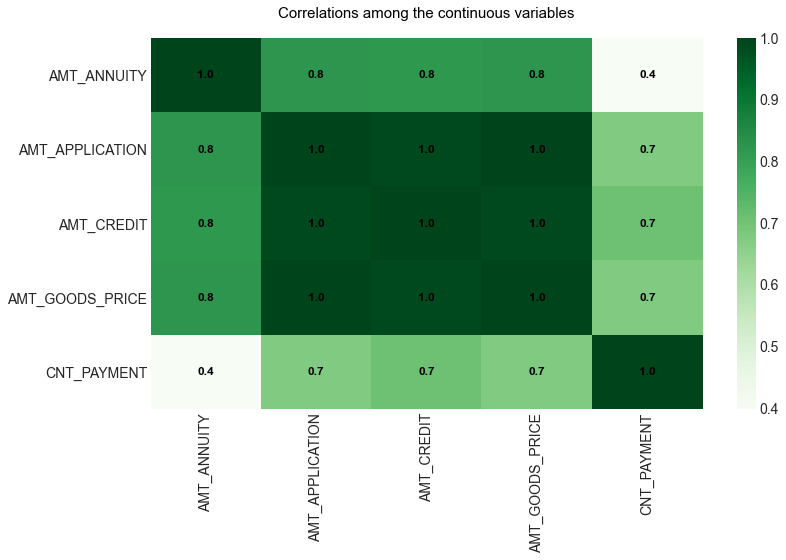

In [195]:
# plotting heatmap

plt.figure(figsize = (12,8))

cor = subset_data.corr()

sns.heatmap(cor,annot =True ,fmt='.1f',cmap='Greens',annot_kws={
                'fontsize':12,'fontweight': 'bold','color':'black'})

plt.title('Correlations among the continuous variables',fontdict={'fontsize':15, 'fontweight' : 10, 'color' : 'Black'},pad = 20)

plt.tight_layout()

plt.show()

**INFERENCES:**
 
            1. Annuity of previous application  has a high positve correlation with :
               a.) How much credit did the client asked on the previous application (AMT_APPLICATION).
               b.) Final credit amaount on previous application that was approved by the bank (AMT_CREDIT)
               c.) Goods prices of good that client asked on previous application.
               
            2. AMT_APPLICATION is highly influenced by AMT_CREDIT and AMT_GOODS_PRICE (positively correlated).
            
            3. Similary strong correlation can be seen between variables AMT_GOODS_PRICE and AMT_CREDIT.

#### 6.3 Segmented Analysis

In [201]:
def plot_func_seg(var_x,var_y):
    
    merged_data.pivot_table(values='TARGET',index=var_x,columns=var_y,aggfunc='mean').plot.bar(figsize=(8,5))
    
    plt.xlabel(f'Previous loan status')
    
    plt.ylabel(f'Defaulters')
    
    plt.title(f'{var_y} Vs Previous loan status')
    
    plt.show()

**6.3.1 Gender vs Previous loan status**

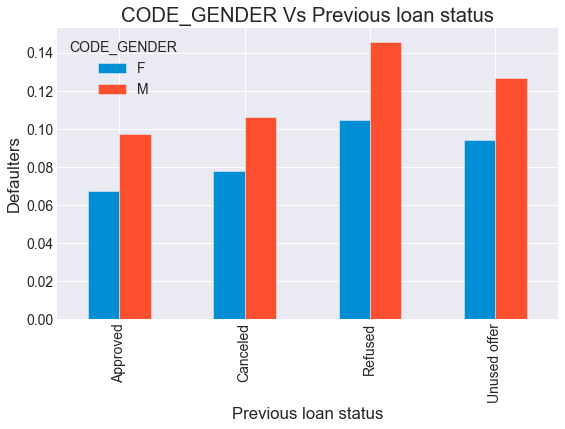

In [202]:
plot_func_seg('NAME_CONTRACT_STATUS','CODE_GENDER')

**INFERENCES:**

            1. Male clients have defaulted more than female clients.Banks can give more weightage to female clients while
               approving loans.
            
            2. Previously refused clients have defaulted more on current application.

**6.3.2 Family Status vs Previous loan Status**

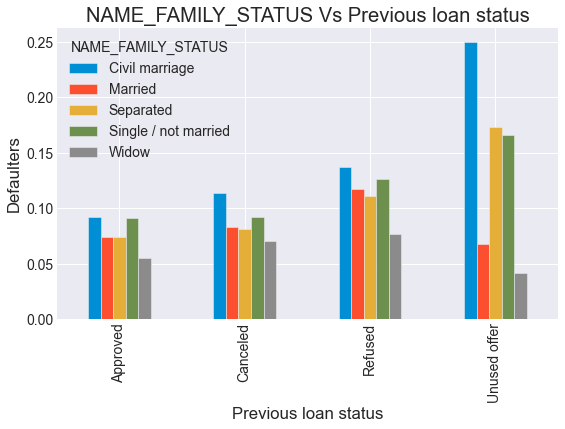

In [204]:
plot_func_seg('NAME_CONTRACT_STATUS','NAME_FAMILY_STATUS')

**INFERENCES:**

Clients who did civil marriage with previously unused loan offers have defaulted most. They are follwed by clients
who are either single or separated.

**6.3.3 Education status vs Previous loan status**

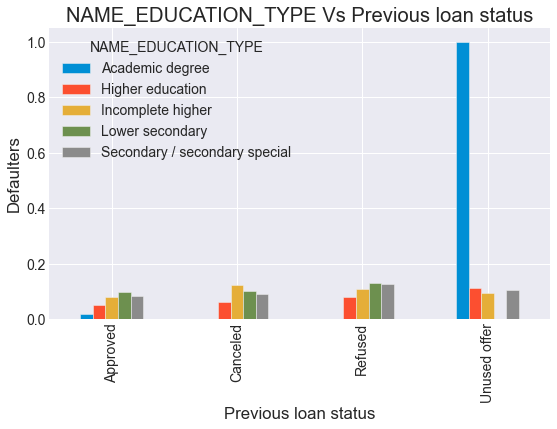

In [205]:
plot_func_seg('NAME_CONTRACT_STATUS','NAME_EDUCATION_TYPE')

In [206]:
merged_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    749468
Higher education                 209549
Incomplete higher                 31826
Lower secondary                   12935
Academic degree                     394
Name: NAME_EDUCATION_TYPE, dtype: int64

**INFERENCES:**

Previously refused clients with lower secondary or secondary education tend to default more in current application.

Although usused loan offer shows highest bar for academic, but it may be due to fact the number of client with acadmeic
degree is very small in number as compared to other clients.

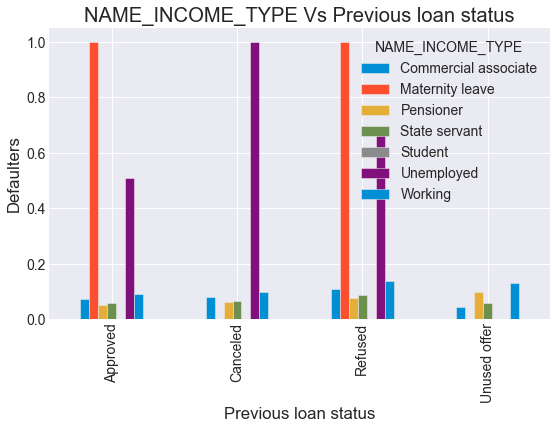

In [212]:
plot_func_seg('NAME_CONTRACT_STATUS','NAME_INCOME_TYPE')

In [214]:
merged_data['NAME_INCOME_TYPE'].value_counts()

Working                 522829
Commercial associate    217757
Pensioner               196209
State servant            67256
Unemployed                  91
Student                     21
Maternity leave              9
Name: NAME_INCOME_TYPE, dtype: int64

**INFERENCES:**

             1. Working,commercial associate and pensioner form a majority of applicants who applied for loan while 
                students, unemployed and maternity leave are small in number, so their analysis won't be fruitful and 
                might lead to biased results.
                
             2. Working applicants seem to form the highest number of defaulters.
             

## CASE STUDY CONCLUSION

**1.** Although most of the clients who applied for loan are female, the default rate is higher in the case of male clients.




**2.**  People belonging to Income type 'Working' form almost 61 % of the  defaulters. This means they had payment  diffculties and banks should do proper check of working clients and take actions  like reducing the loan amount or lending at higher interest.
   


**3.** Banks shouldgive more weightage to clients with 'Higher education' as they seem to default less as compared to people with Secondary level of education . clients with 'Secondary' or lower level of education experience more payment 
   diffculties, also they get refused more.
   


**4.** Clients in Age group [21-30]  have highest default rate .While clients with age > 40 years experience less payment
    difficulties , possibly because they get financially stable. So Banks should do properly scrutiny of clients in age
    group 21-30 and possibly reduce the loan amount.
    
    

**5.**  a.) 6.38 % of previously approved loan applicants defaulted the current loan.
        
        
   b.) 72 % of previously refused loan applicants were able to pay their current loan.
    
    
   
   **This indicates wrong decisions were made by the bank in these cases.**
